# Project Part 1: Estimating Life Expectancy

### We chose the Life Expectancy dataset to answer the question "what are the factors that affect the life expectancy of a population?"

The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. 

We wish to explore the data in order to find which factors affect the life expectancy.

Importing needed libraries

In [1]:
library(ggplot2)
library(MASS)
library(pROC)
library(tidyr)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var


Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# Data Preprocessing

## Uploading our data

In [2]:
df <- read.csv("life_expectancy_data.csv", header=TRUE)

Our data looks like this

In [3]:
df

Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2
Afghanistan,2009,Developing,58.6,281,77,0.01,56.762217,63,2861,...,63,9.42,63,0.1,445.89330,284331,18.6,18.7,0.434,8.9
Afghanistan,2008,Developing,58.1,287,80,0.03,25.873925,64,1599,...,64,8.33,64,0.1,373.36112,2729431,18.8,18.9,0.433,8.7
Afghanistan,2007,Developing,57.5,295,82,0.02,10.910156,63,1141,...,63,6.73,63,0.1,369.83580,26616792,19.0,19.1,0.415,8.4
Afghanistan,2006,Developing,57.3,295,84,0.03,17.171518,64,1990,...,58,7.43,58,0.1,272.56377,2589345,19.2,19.3,0.405,8.1


In [4]:
summary(df)

                Country          Year             Status     Life.expectancy
 Afghanistan        :  16   Min.   :2000   Developed : 512   Min.   :36.30  
 Albania            :  16   1st Qu.:2004   Developing:2426   1st Qu.:63.10  
 Algeria            :  16   Median :2008                     Median :72.10  
 Angola             :  16   Mean   :2008                     Mean   :69.22  
 Antigua and Barbuda:  16   3rd Qu.:2012                     3rd Qu.:75.70  
 Argentina          :  16   Max.   :2015                     Max.   :89.00  
 (Other)            :2842                                    NA's   :10     
 Adult.Mortality infant.deaths       Alcohol        percentage.expenditure
 Min.   :  1.0   Min.   :   0.0   Min.   : 0.0100   Min.   :    0.000     
 1st Qu.: 74.0   1st Qu.:   0.0   1st Qu.: 0.8775   1st Qu.:    4.685     
 Median :144.0   Median :   3.0   Median : 3.7550   Median :   64.913     
 Mean   :164.8   Mean   :  30.3   Mean   : 4.6029   Mean   :  738.251     
 3rd Qu.:

Let's look at our life expectancy distribution regarding with regards to Status

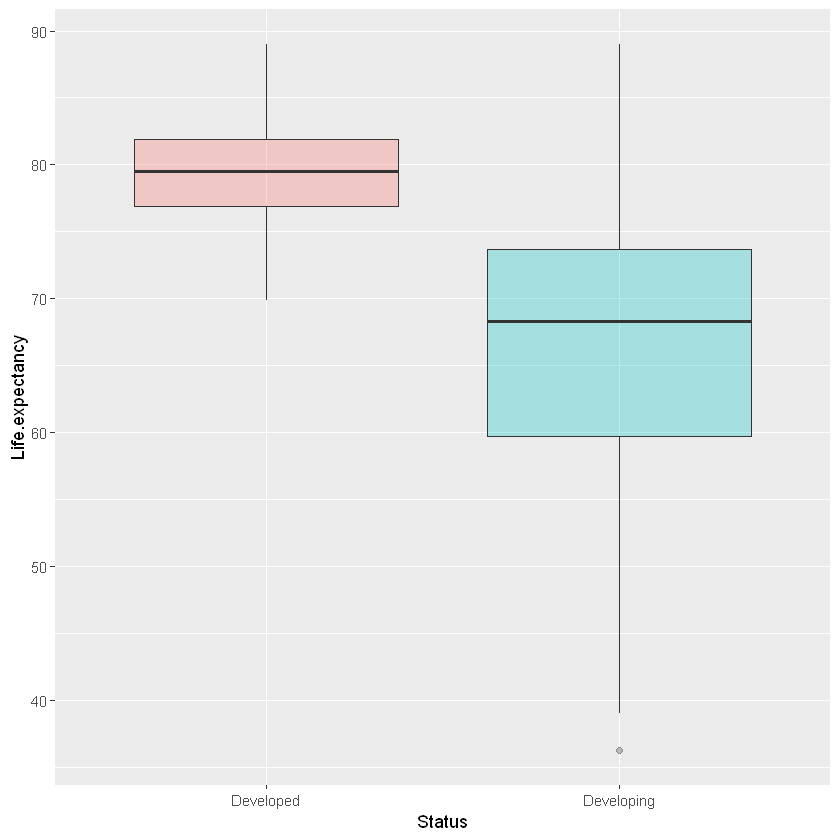

In [276]:
ggplot(df, aes(x = Status, y=Life.expectancy, fill=Status)) + 
geom_boxplot(alpha=0.3) +
    theme(legend.position="none") 

We can see that people in developed countries tend to live longer than people developing countries.

We are going to see discover later what are the factors that can estimate the life expectancy of a population.

## Handling missing values

We notice that we have missing values in our data
we will pin the locations and type of these missing values and brainstorm ways to handle them

##### Locating missing values

In [5]:
#checking how many missing values we have
sum(is.na(df) == TRUE)

[1] 2563

In [6]:
#checking for the columns in which these missing values are at
col_num = unique(which(is.na(df), arr.ind=TRUE)[,2])

In [7]:
#getting the names of columns that contain missing values
missing = vector(mode="character", length=length(col_num))
counter = 1
for (i in col_num){
    missing[[counter]] <- colnames(df)[i]
    counter = counter +1
}

In [8]:
missing

[1] "Life.expectancy"                 "Adult.Mortality"                
 [3] "Alcohol"                         "Hepatitis.B"                    
 [5] "BMI"                             "Polio"                          
 [7] "Total.expenditure"               "Diphtheria"                     
 [9] "GDP"                             "Population"                     
[11] "thinness..1.19.years"            "thinness.5.9.years"             
[13] "Income.composition.of.resources" "Schooling"

###### we have missing values in 14 values
it is important to note that our target has missing values, let's check how many we have and handle them accordingly

In [9]:
sum(is.na(df$Life.expectancy))

[1] 10

In [10]:
# we will omit these values since they are not much
df <- df %>% drop_na(Life.expectancy)

In [11]:
#we can see that 10 rows were removed
dim(df)

[1] 2928   22

In [12]:
#let's readjust the indices in the new dataframe
rownames(df)<-1:nrow(df)

In [13]:
#we notice that NA's in Adult.Mortality are in the same rows as NA's in Life Expectancy
#let's check how many we have for the rest of the variabeles
sum(is.na(df$Alcohol))

[1] 193

we have a significant amount of observations with missing values
for thsi case, we will not delete them, instead we will explore where these missing values are located and replace them by other values respectively

In [14]:
# retrieving the rows with missing values
missing_alcohol <- df[is.na(df$Alcohol), ]     

In [15]:
missing_alcohol

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
33,Algeria,2015,Developing,75.6,19,21,NA,0,95,63,...,95,NA,95,0.1,4132.76292,39871528,6.0,5.8,0.743,14.4
49,Angola,2015,Developing,52.4,335,66,NA,0,64,118,...,7,NA,64,1.9,3695.79375,2785935,8.3,8.2,0.531,11.4
65,Antigua and Barbuda,2015,Developing,76.4,13,0,NA,0,99,0,...,86,NA,99,0.2,13566.95410,NA,3.3,3.3,0.784,13.9
81,Argentina,2015,Developing,76.3,116,8,NA,0,94,0,...,93,NA,94,0.1,13467.12360,43417765,1.0,0.9,0.826,17.3
97,Armenia,2015,Developing,74.8,118,1,NA,0,94,33,...,96,NA,94,0.1,369.65478,291695,2.1,2.2,0.741,12.7
113,Australia,2015,Developed,82.8,59,1,NA,0,93,74,...,93,NA,93,0.1,56554.38760,23789338,0.6,0.6,0.937,20.4
129,Austria,2015,Developed,81.5,65,0,NA,0,93,309,...,93,NA,93,0.1,43665.94700,8633169,1.9,2.1,0.892,15.9
145,Azerbaijan,2015,Developing,72.7,118,5,NA,0,96,0,...,98,NA,96,0.1,55.31382,9649341,2.8,2.9,0.758,12.7
161,Bahamas,2015,Developing,76.1,147,0,NA,0,95,0,...,95,NA,95,0.1,NA,NA,2.5,2.5,0.790,12.6
177,Bahrain,2015,Developing,76.9,69,0,NA,0,98,0,...,98,NA,98,0.1,22688.87824,NA,6.2,6.1,0.823,14.5


In [16]:
length(unique(df$Country))

[1] 183

In [17]:
length(unique(missing_alcohol$Country))

[1] 177

We notice that our dataset is missing alcohol levels from almost all countries
We will approach this by replacing the value in each country by the mean of the two values of the two previous years

The equation will be:
<center>
    Alc[Year] = (Alc[Year-1] + Alc[Year+1]) / 2                     (1)
    </center>
if it's the last row in that country:
<center>
    Alc[Year] = (Alc[Year+1] + Alc[Year+2]) / 2                     (2)
    </center>
 
If it's the first row in that country:
<center>
    Alc[Year] = (Alc[Year-1] + Alc[Year-2]) / 2                     (3)
    </center>
    
    

In [18]:
#list of row indices with missing values for alcohol
missing_rows = which(is.na(df$Alcohol))
range = 1:length(missing_rows)

In [19]:
#filling the NA's according to our approach
for (i in range){
    if (df[missing_rows[i], "Year"] == 2015)
    {
        #eq. (2)
        df[missing_rows[i], "Alcohol"] <- (df[missing_rows[i]+1, "Alcohol"] + df[missing_rows[i]+2, "Alcohol"]) / 2
    }
    
    else if (df[missing_rows[i], "Year"] == 2000)
    {
        #eq. (3)
        df[missing_rows[i], "Alcohol"] <- (df[missing_rows[i]-1, "Alcohol"] + df[missing_rows[i]-2, "Alcohol"]) / 2
    }
    else 
    {
        #eq. (1)
        df[missing_rows[i], "Alcohol"] <- (df[missing_rows[i]-1, "Alcohol"] + df[missing_rows[i]+1, "Alcohol"]) / 2
    }
}

In [20]:
which(is.na(df$Alcohol))

[1] 2401 2402 2403 2404 2405 2406 2407 2408 2409 2410 2411 2412 2413 2414 2415
[16] 2416

In [21]:
df[2401:2416,]

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
2401,South Sudan,2015,Developing,57.3,332,26,NA,0.00000,31,878,...,41,NA,31,3.4,758.7258,11882136,NA,NA,0.421,4.9
2402,South Sudan,2014,Developing,56.6,343,26,NA,46.07447,NA,441,...,44,2.74,39,3.5,1151.8617,1153971,NA,NA,0.421,4.9
2403,South Sudan,2013,Developing,56.4,345,26,NA,47.44453,NA,525,...,5,2.62,45,3.6,1186.1133,1117749,NA,NA,0.417,4.9
2404,South Sudan,2012,Developing,56.0,347,26,NA,38.33823,NA,1952,...,64,2.77,59,3.8,958.4558,1818258,NA,NA,0.419,4.9
2405,South Sudan,2011,Developing,55.4,355,27,NA,0.00000,NA,1256,...,66,NA,61,3.9,176.9713,1448857,NA,NA,0.429,4.9
2406,South Sudan,2010,Developing,55.0,359,27,NA,0.00000,NA,0,...,NA,NA,NA,4.0,1562.2393,167192,NA,NA,0.000,0.0
2407,South Sudan,2009,Developing,54.3,369,27,NA,0.00000,NA,0,...,NA,NA,NA,4.2,1264.7900,967667,NA,NA,0.000,0.0
2408,South Sudan,2008,Developing,53.6,377,27,NA,0.00000,NA,0,...,NA,NA,NA,4.2,1678.7119,9263136,NA,NA,0.000,0.0
2409,South Sudan,2007,Developing,53.1,381,27,NA,0.00000,NA,0,...,NA,NA,NA,4.2,NA,88568,NA,NA,0.000,0.0
2410,South Sudan,2006,Developing,52.5,383,28,NA,0.00000,NA,0,...,NA,NA,NA,4.1,NA,8468152,NA,NA,0.000,0.0


we notice that all the NA's left are for South Sudan, we also notice that this country has a lot of missing data

# Solution: ELIMINATE SOUTH SUDAN!

In [22]:
df <- df[-(2401:2416),]

In [23]:
#check if any left missing data for alchol
sum(is.na(df$Alcohol))

[1] 0

Yay! Now let's move on to find others!

But first, readjust the indices!

In [24]:
rownames(df)<-1:nrow(df)

In [25]:
#we have many, let's see how we can deal with them
sum(is.na(df$Hepatitis.B))

[1] 538

In [26]:
#dataframe of the rows with missing values for Hepatitis B
missing_hb <- df[is.na(df$Hepatitis.B), ] 

In [27]:
missing_hb

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
45,Algeria,2003,Developing,71.7,146,20,0.34,25.0185226,NA,15374,...,87,3.60,87,0.1,294.335560,3243514,6.3,6.1,0.663,11.5
46,Algeria,2002,Developing,71.6,145,20,0.36,148.5119843,NA,5862,...,86,3.73,86,0.1,1774.336730,3199546,6.3,6.2,0.653,11.1
47,Algeria,2001,Developing,71.4,145,20,0.23,147.9860714,NA,2686,...,89,3.84,89,0.1,1732.857979,31592153,6.4,6.3,0.644,10.9
48,Algeria,2000,Developing,71.3,145,21,0.25,154.4559436,NA,0,...,86,3.49,86,0.1,1757.177970,3118366,6.5,6.4,0.636,10.7
58,Angola,2006,Developing,47.7,381,90,5.84,25.0868882,NA,765,...,36,4.54,34,2.5,262.415149,2262399,9.8,9.7,0.439,7.2
59,Angola,2005,Developing,47.4,382,92,5.04,98.1914512,NA,258,...,39,4.10,38,2.6,1443.991929,19552542,1.0,9.9,0.426,6.8
60,Angola,2004,Developing,47.1,386,94,3.53,8.8667775,NA,29,...,4,4.71,4,2.5,141.868440,18865716,1.2,1.1,0.415,6.4
61,Angola,2003,Developing,46.8,388,95,3.49,35.9334912,NA,1196,...,4,4.41,4,2.4,779.468356,1823369,1.4,1.3,0.406,5.9
62,Angola,2002,Developing,46.5,391,96,2.82,24.0379420,NA,11945,...,37,3.63,41,2.3,711.181716,17572649,1.5,1.5,0.401,5.5
63,Angola,2001,Developing,45.7,44,97,2.58,30.3599365,NA,9046,...,41,5.38,38,2.1,526.168743,16983266,1.7,1.7,0.391,5.1


After observing the pattern in each country, it appears that the values for Hepatitis B across the years in each country is consistent and does not vary a lot.
Hence, we decided to replace them by the mean value according to each country.

In [28]:
#let's code it
#list of row indices with missing values for alcohol
missing_rows = which(is.na(df$Hepatitis.B))
range = 1:length(missing_rows)

In [29]:
for (i in range){
    country = df[missing_rows[i], "Country"]
    df[missing_rows[i], "Hepatitis.B"] <- mean(df[df$Country == country & !is.na(df$Hepatitis.B), "Hepatitis.B"])
}

In [30]:
sum(is.na(df$Hepatitis.B))

[1] 144

In [31]:
unique(df[is.na(df$Hepatitis.B), "Country"])

[1] Denmark                                             
[2] Finland                                             
[3] Hungary                                             
[4] Iceland                                             
[5] Japan                                               
[6] Norway                                              
[7] Slovenia                                            
[8] Switzerland                                         
[9] United Kingdom of Great Britain and Northern Ireland
193 Levels: Afghanistan Albania Algeria Angola Antigua and Barbuda ... Zimbabwe

###### Unfortunately, we cannot eradicate an entire continent + Japan 

###### so, we will give them an approximate values similar to other developed countries since they are all (-Finland) developed, so we decided to compare the geographical, social, and medical status, we decided that Finlad shall be given the same average

In [32]:
mean_hb_developed = mean(df[df$Status == "Developed" & !is.na(df$Hepatitis.B),  "Hepatitis.B"])
missing_rows = which(is.na(df$Hepatitis.B))
range = 1:length(missing_rows)
for (i in range){
    df[missing_rows[i], "Hepatitis.B"] <- mean_hb_developed
}

In [33]:
sum(is.na(df$Hepatitis.B))

[1] 0

Yay! Let's move on to fix others!

In [34]:
#we don't have many, let's try to replace them
sum(is.na(df$BMI))

[1] 16

In [35]:
#dataframe of the rows with missing values for BMI
missing_bmi <- df[is.na(df$BMI), ] 

In [36]:
missing_bmi

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
2433,Sudan,2015,Developing,64.1,225,58,0.01,0.00000,93.00000,3585,...,93,NA,93,0.3,2513.8847,3864783,NA,NA,0.488,7.2
2434,Sudan,2014,Developing,63.8,229,59,0.01,253.60865,94.00000,676,...,94,8.43,94,0.3,2176.8983,37737913,NA,NA,0.485,7.2
2435,Sudan,2013,Developing,63.5,232,60,0.01,227.83532,93.00000,2813,...,93,8.42,93,0.3,1955.6680,36849918,NA,NA,0.478,7.0
2436,Sudan,2012,Developing,63.2,235,61,0.01,220.52219,92.00000,8523,...,92,8.20,92,0.3,1892.8944,3599192,NA,NA,0.468,6.8
2437,Sudan,2011,Developing,62.7,241,61,2.12,196.68922,93.00000,5616,...,93,8.30,93,0.3,1666.8578,35167314,NA,NA,0.463,7.0
2438,Sudan,2010,Developing,62.5,243,62,1.77,172.00979,75.00000,680,...,9,7.97,9,0.3,1476.4789,34385963,NA,NA,0.461,7.0
2439,Sudan,2009,Developing,62.0,248,63,1.99,17.05369,72.00000,68,...,81,8.40,81,0.3,1226.8844,3365619,NA,NA,0.456,6.8
2440,Sudan,2008,Developing,61.8,251,64,2.01,128.63627,78.00000,129,...,85,8.17,86,0.3,1291.5288,32955496,NA,NA,0.444,6.3
2441,Sudan,2007,Developing,61.4,254,65,2.01,86.13167,78.00000,327,...,84,4.72,84,0.3,1115.6952,32282526,NA,NA,0.440,6.4
2442,Sudan,2006,Developing,61.0,26,66,1.90,60.33686,6.00000,228,...,77,3.93,78,0.2,893.8794,316764,NA,NA,0.430,6.2


Okay, not that I mind, but Sudan is missing all the values for BMI, Thiness 1 too 19 years and Thinness 5 to 9 years
We cannot possibly replace ALL OF THEM (especially that South Sudan is gone)
Hence, we eliminate Sudan as well!

In [37]:
sudan <- df[is.na(df$BMI),]
#drop columns for sudan
df <- df %>% drop_na(BMI)
#adjust the indices for the dataset
rownames(df)<-1:nrow(df)

In [38]:
mean_hb = mean(df[df$Hepatitis.B>10, "Hepatitis.B"])
df[df$Hepatitis.B <10, "Hepatitis.B"] <- mean_hb

In [39]:
dim(df)

[1] 2896   22

We still have most of our dataset, let's move on to other missing values

In [40]:
sum(is.na(df$Polio))

[1] 8

It's salvageable

In [41]:
missing_polio <- df[is.na(df$Polio), ]
missing_polio

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
1739,Montenegro,2005,Developing,73.6,133,0,2.695,527.307672,48.5,0,...,NA,8.46,NA,0.1,3674.61792,614261,2.3,2.3,0.746,12.8
1740,Montenegro,2004,Developing,73.5,134,0,0.010,57.121901,48.5,0,...,NA,8.45,NA,0.1,338.19954,613353,2.3,2.4,0.740,12.6
1741,Montenegro,2003,Developing,73.5,134,0,0.010,495.078296,48.5,0,...,NA,8.91,NA,0.1,2789.17350,612267,2.4,2.4,0.000,0.0
1742,Montenegro,2002,Developing,73.4,136,0,0.010,36.480240,48.5,0,...,NA,8.33,NA,0.1,216.24327,69828,2.5,2.5,0.000,0.0
1743,Montenegro,2001,Developing,73.3,136,0,0.010,33.669814,48.5,0,...,NA,8.23,NA,0.1,199.58396,67389,2.5,2.6,0.000,0.0
1744,Montenegro,2000,Developing,73.0,144,0,0.010,274.547260,48.5,0,...,NA,7.32,NA,0.1,1627.42893,6495,2.6,2.7,0.000,0.0
2575,Timor-Leste,2001,Developing,59.4,269,3,0.500,6.556583,76.0,0,...,NA,3.75,NA,0.1,56.42499,892531,12.1,12.2,0.470,9.8
2576,Timor-Leste,2000,Developing,58.7,276,3,0.500,49.069672,76.0,0,...,NA,3.26,NA,0.1,422.28633,87167,12.2,12.2,0.000,0.0


Let's observe the two countries

In [42]:
df[df$Country == "Montenegro",]

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
1729,Montenegro,2015,Developing,76.1,16,0,0.010,0.00000,82.00000,0,...,89,NA,89,0.1,6461.1926,622159,1.8,1.8,0.804,15.1
1730,Montenegro,2014,Developing,75.9,17,0,0.010,726.02918,87.00000,0,...,91,6.42,91,0.1,7378.3453,62181,1.8,1.9,0.803,15.1
1731,Montenegro,2013,Developing,75.8,19,0,0.010,707.14469,83.79607,0,...,94,6.43,94,0.1,7186.4298,62127,1.8,1.9,0.799,15.1
1732,Montenegro,2012,Developing,75.6,11,0,0.010,648.13318,83.79607,0,...,94,7.25,94,0.1,6586.7193,6261,1.9,1.9,0.797,15.1
1733,Montenegro,2011,Developing,75.4,113,0,6.560,666.73744,91.00000,5,...,95,6.92,95,0.1,7318.7424,6279,1.9,2.0,0.792,15.1
1734,Montenegro,2010,Developing,75.3,115,0,6.560,635.48494,83.79607,5,...,93,6.90,94,0.1,6682.2812,619428,2.0,2.0,0.787,15.0
1735,Montenegro,2009,Developing,75.0,117,0,6.450,489.68187,87.00000,0,...,91,6.70,92,0.1,6698.7944,618294,2.0,2.1,0.785,14.6
1736,Montenegro,2008,Developing,74.6,121,0,6.170,709.13112,93.00000,0,...,95,6.13,95,0.1,7325.7347,616969,2.1,2.1,0.774,14.2
1737,Montenegro,2007,Developing,74.2,125,0,4.980,678.51889,83.79607,0,...,92,6.74,92,0.1,5957.1457,615875,2.1,2.2,0.762,13.6
1738,Montenegro,2006,Developing,73.8,13,0,5.380,595.73069,83.79607,0,...,9,8.10,9,0.1,4383.5960,61525,2.2,2.2,0.751,13.2


In [43]:
df[df$Country == "Timor-Leste",]

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
2561,Timor-Leste,2015,Developing,68.3,152,2,0.01,0.000000,76,43,...,75,NA,76,0.1,1161.76935,124977,1.9,11.1,0.603,12.5
2562,Timor-Leste,2014,Developing,68.0,155,2,0.01,28.145785,77,47,...,76,1.48,77,0.1,1153.51578,1212814,1.9,11.1,0.612,12.5
2563,Timor-Leste,2013,Developing,67.7,158,2,0.01,3.379875,82,4,...,82,1.29,82,0.1,117.76567,1184366,11.1,11.2,0.620,12.5
2564,Timor-Leste,2012,Developing,67.4,159,2,0.01,30.179985,83,16,...,83,1.10,83,0.1,1117.77724,115676,11.2,11.3,0.618,12.5
2565,Timor-Leste,2011,Developing,67.2,161,2,0.50,2.726571,67,763,...,66,0.76,67,0.1,114.56179,1131523,11.3,11.4,0.607,12.5
2566,Timor-Leste,2010,Developing,66.9,163,2,0.10,38.583766,72,50,...,72,0.92,72,0.1,849.86270,119591,11.5,11.5,0.599,12.4
2567,Timor-Leste,2009,Developing,66.6,165,2,0.09,36.199487,72,10,...,78,1.20,72,0.1,757.31144,19221,11.6,11.6,0.599,12.1
2568,Timor-Leste,2008,Developing,66.2,168,2,0.06,36.691989,79,0,...,79,0.74,79,0.1,643.71911,17811,11.7,11.7,0.566,11.7
2569,Timor-Leste,2007,Developing,65.8,173,2,0.05,11.757669,76,0,...,7,0.37,7,0.1,524.89594,164973,11.8,11.8,0.541,11.3
2570,Timor-Leste,2006,Developing,64.9,186,2,0.04,28.125605,76,90,...,62,0.65,63,0.1,441.53226,148621,11.9,11.9,0.511,11.0


We notice that besides the NA values we have, we notice an unexpected value for Country = "Montenegro" for 2006 where Polio= 9%
and for Country = "Timor-Leste" for 2007 where Polio = 7%
We consider these to be missing values as well and replace them by the obtained mean

First, for Montenegro

In [44]:
#calculating the mean of non NA values
mean_polio_montenegro = mean(df[df$Country == "Montenegro" & !is.na(df$Polio) & df$Polio >10,  "Polio"])
missing_rows = which(is.na(df$Polio))
range = 1:6
for (i in range){
    #replacing the NA values wih the mean
    df[missing_rows[i], "Polio"] <- mean_polio_montenegro
}

In [45]:
#replacing the Polio=9% with the mean as well
df[df$Country == "Montenegro" & !is.na(df$Polio) & df$Polio <30,  "Polio"] <- mean_polio_montenegro

Second, for Timor-Leste

In [46]:
#calculating the mean of non NA values
mean_polio_tl = mean(df[df$Country == "Timor-Leste" & !is.na(df$Polio) & df$Polio >10,  "Polio"])
missing_rows = which(is.na(df$Polio))
range = 1:length(missing_rows)
for (i in range){
    #replacing the NA values wih the mean
    df[missing_rows[i], "Polio"] <- mean_polio_tl
}

In [47]:
#replacing the Polio=7% with the mean as well
df[df$Country == "Timor-Leste" & !is.na(df$Polio) & df$Polio <30,  "Polio"] <- mean_polio_tl

In [48]:
mean_polio = mean(df[df$Polio>10, "Polio"])
df[df$Polio <30, "Polio"] <- mean_polio

In [49]:
sum(is.na(df$Polio))

[1] 0

Yay! Moving on!

In [50]:
sum(is.na(df$Total.expenditure))

[1] 212

Oh Lord!

In [51]:
missing_te <- df[is.na(df$Total.expenditure),]
missing_te

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
33,Algeria,2015,Developing,75.6,19,21,0.270,0,95,63,...,95.00000,NA,95,0.1,4132.76292,39871528,6.0,5.8,0.743,14.4
49,Angola,2015,Developing,52.4,335,66,8.215,0,64,118,...,87.30377,NA,64,1.9,3695.79375,2785935,8.3,8.2,0.531,11.4
65,Antigua and Barbuda,2015,Developing,76.4,13,0,8.570,0,99,0,...,86.00000,NA,99,0.2,13566.95410,NA,3.3,3.3,0.784,13.9
81,Argentina,2015,Developing,76.3,116,8,8.105,0,94,0,...,93.00000,NA,94,0.1,13467.12360,43417765,1.0,0.9,0.826,17.3
97,Armenia,2015,Developing,74.8,118,1,3.850,0,94,33,...,96.00000,NA,94,0.1,369.65478,291695,2.1,2.2,0.741,12.7
113,Australia,2015,Developed,82.8,59,1,9.790,0,93,74,...,93.00000,NA,93,0.1,56554.38760,23789338,0.6,0.6,0.937,20.4
129,Austria,2015,Developed,81.5,65,0,12.070,0,93,309,...,93.00000,NA,93,0.1,43665.94700,8633169,1.9,2.1,0.892,15.9
145,Azerbaijan,2015,Developing,72.7,118,5,1.075,0,96,0,...,98.00000,NA,96,0.1,55.31382,9649341,2.8,2.9,0.758,12.7
161,Bahamas,2015,Developing,76.1,147,0,9.435,0,95,0,...,95.00000,NA,95,0.1,NA,NA,2.5,2.5,0.790,12.6
177,Bahrain,2015,Developing,76.9,69,0,1.610,0,98,0,...,98.00000,NA,98,0.1,22688.87824,NA,6.2,6.1,0.823,14.5


We notice that for the misisng values of Tota expenditure, the value of percentage expenditure is 0
We also notice that the value of total expenditure is close the 2 values of the neighboring years.
Hence, our plan is the following:
*  replace the missing value of total expenditure with the mean of the two neighboring yearly values of same country
*  fill the value for percentage expenditure with the mean of the two neighboring yearly values of same country

The equation will be:
<center>
    tot.ex[Year] = (tot.ex[Year-1] + tot.ex[Year+1]) / 2                     (1)
    </center>
if it's the last row in that country:
<center>
    tot.ex[Year] = (tot.ex[Year+1] + tot.ex[Year+2]) / 2                     (2)
    </center>
 
If it's the first row in that country:
<center>
    tot.ex[Year] = (tot.ex[Year-1] + tot.ex[Year-2]) / 2                     (3)
    </center>
    
 

In [52]:
#list of row indices with missing values for alcohol
missing_rows = which(is.na(df$Total.expenditure))
range = 1:length(missing_rows)

In [53]:
#filling the NA's according to our approach
for (i in range){
    if (df[missing_rows[i], "Year"] == 2015)
    {
        #eq. (2)
        #total expenditure
        df[missing_rows[i], "Total.expenditure"] <- (df[missing_rows[i]+1, "Total.expenditure"] + df[missing_rows[i]+2, "Total.expenditure"]) / 2
        #percentage expenditure
        df[missing_rows[i], "percentage.expenditure"] <- (df[missing_rows[i]+1, "percentage.expenditure"] + df[missing_rows[i]+2, "percentage.expenditure"]) / 2        
    }
    
    else if (df[missing_rows[i], "Year"] == 2000)
    {
        #eq. (3)
        #total expenditure
        df[missing_rows[i], "Total.expenditure"] <- (df[missing_rows[i]-1, "Total.expenditure"] + df[missing_rows[i]-2, "Total.expenditure"]) / 2
        #percentage expenditure
        df[missing_rows[i], "percentage.expenditure"] <- (df[missing_rows[i]-1, "percentage.expenditure"] + df[missing_rows[i]-2, "percentage.expenditure"]) / 2
    }
    else 
    {
        #eq. (1)
        #total expenditure
        df[missing_rows[i], "Total.expenditure"] <- (df[missing_rows[i]-1, "Total.expenditure"] + df[missing_rows[i]+1, "Total.expenditure"]) / 2
        #percentage expenditure
        df[missing_rows[i], "percentage.expenditure"] <- (df[missing_rows[i]-1, "percentage.expenditure"] + df[missing_rows[i]+1, "percentage.expenditure"]) / 2
    }
}

In [54]:
which(is.na(df$Total.expenditure))

[1]  705  706  707  708  709  710  711  712  713  714  715  716  717  718  719
[16]  720 1246 1247 1248 2369 2370 2371 2372 2373 2374 2375 2376 2377 2378 2379
[31] 2380 2381 2382 2383 2384

We notice that Democratic People's Republic of Korea and Somalia have the following columns all missing:
*  Percentage expenditure
*  Total expenditure
*  GDP
*  Population
*  Income composition of resources
*  Schooling

Hence, these two country will be dropped

In [55]:
korea <- df[705:720,]
df <- df[-(705:720),] #dropping the Democratic People's Republic of Korea

In [56]:
#readjusting the index
rownames(df)<-1:nrow(df)

In [57]:
which(is.na(df$Total.expenditure))

[1] 1230 1231 1232 2353 2354 2355 2356 2357 2358 2359 2360 2361 2362 2363 2364
[16] 2365 2366 2367 2368

In [58]:
somalia <- df[df$Country == "Somalia",]
df <- df[-(2353:2368),] #dropping Somalia

In [59]:
#readjusting the index
rownames(df)<-1:nrow(df)

In [60]:
iraq = which(is.na(df$Total.expenditure))

In [61]:
df[1230:1232,]

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
1230,Iraq,2002,Developing,74,14,30,0.15,0,65,0,...,76.00000,NA,77,0.1,NA,24939299,5.5,5.3,0.614,9.1
1231,Iraq,2001,Developing,72,142,30,0.17,0,66,4088,...,87.30377,NA,78,0.1,NA,24251649,5.6,5.3,0.607,8.7
1232,Iraq,2000,Developing,70,144,30,0.20,0,67,726,...,83.00000,NA,8,0.1,NA,23565413,5.6,5.4,0.603,8.6


We have three missing values, in this case, we fill 2002, then 2001 then 2000 in that order with the mean of the two years that follow respectively

In [62]:
range = 1:length(iraq)
for (i in range){
    #total expenditure
    df[iraq[i], "Total.expenditure"] <- (df[iraq[i]-1, "Total.expenditure"] + df[iraq[i]-2, "Total.expenditure"]) / 2
    #percentage expenditure
    df[iraq[i], "percentage.expenditure"] <- (df[iraq[i]-1, "percentage.expenditure"] + df[iraq[i]-2, "percentage.expenditure"]) / 2   
}
   

In [63]:
sum(is.na(df$Total.expenditure))

[1] 0

Okay moving on to others

In [64]:
sum(is.na(df$Diphtheria))

[1] 8

In [65]:
which(is.na(df$Diphtheria))

[1] 1723 1724 1725 1726 1727 1728 2543 2544

In [66]:
df[2543:2544, ]

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
2543,Timor-Leste,2001,Developing,59.4,269,3,0.5,6.556583,76,0,...,67.53846,3.75,NA,0.1,56.42499,892531,12.1,12.2,0.47,9.8
2544,Timor-Leste,2000,Developing,58.7,276,3,0.5,49.069672,76,0,...,67.53846,3.26,NA,0.1,422.28633,87167,12.2,12.2,0.00,0.0


We have some missing values
we will replace them by the mean of the column for thsi country
Also, we notice and error vaue of 9, we will also replace it by the mean

In [67]:
#calculating the mean of non NA values
mean_dp_montenegro = mean(df[df$Country == "Montenegro" & !is.na(df$Diphtheria) & df$Diphtheria >10,  "Diphtheria"])
range = 1723:1728
for (i in range){
    #replacing the NA values wih the mean
    df[i, "Diphtheria"] <- mean_dp_montenegro
}

In [68]:
#replacing the Polio=7% with the mean as well
df[df$Country == "Montenegro" & !is.na(df$Diphtheria) & df$Diphtheria <30,  "Diphtheria"] <- mean_dp_montenegro

For Timor-leste

In [69]:
#calculating the mean of non NA values
mean_dp_tl = mean(df[df$Country == "Timor-Leste" & !is.na(df$Diphtheria) & df$Diphtheria >10,  "Diphtheria"])
range = 2543:2544
for (i in range){
    #replacing the NA values wih the mean
    df[i, "Diphtheria"] <- mean_dp_tl
}

In [70]:
#replacing the Polio=7% with the mean as well
df[df$Country == "Timor-Leste" & !is.na(df$Diphtheria) & df$Diphtheria <30,  "Diphtheria"] <- mean_dp_tl

In [71]:
sum(is.na(df$Diphtheria))

[1] 0

Moving on

In [72]:
sum(is.na(df$GDP))

[1] 406

Here we go again

In [73]:
which(is.na(df$GDP))

[1]  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175
 [16]  176  305  306  307  308  309  310  311  312  313  314  315  316  317  318
 [31]  319  320  433  434  435  436  437  438  439  440  441  442  443  444  445
 [46]  446  447  448  609  610  611  612  613  614  615  616  617  618  619  620
 [61]  621  622  623  624  689  690  691  692  693  694  695  696  697  698  699
 [76]  700  701  702  703  704  705  706  707  708  709  710  711  712  713  714
 [91]  715  716  717  718  719  720  785  786  787  788  789  790  791  792  793
[106]  794  795  796  797  798  799  800  833  834  835  836  945  946  947  948
[121]  949  950  951  952  953  954  955  956  957  958  959  960 1201 1202 1203
[136] 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1229 1230
[151] 1231 1232 1393 1394 1395 1396 1397 1398 1399 1400 1401 1402 1403 1404 1405
[166] 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418 1419 1420
[181] 1421 1422 1423 1424 1489 1490 1491 1492 1681 1682 1683 1684 1685 1686 1687
[196] 1688 1689 1690 1691 1692 1693 1694 1695 1696 1953 2065 2066 2067 2068 2069
[211] 2070 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083 2084
[226] 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2145 2146 2147
[241] 2148 2149 2150 2151 2152 2153 2154 2155 2156 2157 2158 2159 2160 2161 2162
[256] 2163 2164 2165 2166 2167 2168 2169 2170 2171 2172 2173 2174 2175 2176 2208
[271] 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318 2319
[286] 2320 2465 2466 2467 2468 2469 2470 2471 2472 2513 2514 2515 2516 2517 2518
[301] 2519 2520 2521 2522 2523 2524 2525 2526 2527 2528 2689 2690 2691 2692 2693
[316] 2694 2695 2696 2697 2698 2699 2700 2701 2702 2703 2704 2705 2706 2707 2708
[331] 2709 2710 2711 2712 2713 2714 2715 2716 2717 2718 2719 2720 2721 2722 2723
[346] 2724 2725 2726 2727 2728 2729 2730 2731 2732 2733 2734 2735 2736 2785 2786
[361] 2787 2788 2789 2790 2791 2792 2793 2794 2795 2796 2797 2798 2799 2800 2801
[376] 2802 2803 2804 2805 2806 2807 2808 2809 2810 2811 2812 2813 2814 2815 2816
[391] 2817 2818 2819 2820 2821 2822 2823 2824 2825 2826 2827 2828 2829 2830 2831
[406] 2832

we notice that there is a pattern is missing values, we expect to have countries with most (or all of their) GDP values missing
Let's find out who these countries are

In [74]:
length(unique(df[is.na(df$GDP),]$Country))

[1] 30

In [75]:
unique(df[is.na(df$GDP),]$Country)

[1] Bahamas                                             
 [2] Bolivia (Plurinational State of)                    
 [3] CÃ´te d'Ivoire                                      
 [4] Congo                                               
 [5] Czechia                                             
 [6] Democratic Republic of the Congo                    
 [7] Egypt                                               
 [8] Eritrea                                             
 [9] Gambia                                              
[10] Iran (Islamic Republic of)                          
[11] Iraq                                                
[12] Kyrgyzstan                                          
[13] Lao People's Democratic Republic                    
[14] Libya                                               
[15] Micronesia (Federated States of)                    
[16] Papua New Guinea                                    
[17] Republic of Korea                                   
[18] Republic of Moldova                                 
[19] Saint Lucia                                         
[20] Saint Vincent and the Grenadines                    
[21] Sao Tome and Principe                               
[22] Slovakia                                            
[23] Syrian Arab Republic                                
[24] The former Yugoslav republic of Macedonia           
[25] United Kingdom of Great Britain and Northern Ireland
[26] United Republic of Tanzania                         
[27] United States of America                            
[28] Venezuela (Bolivarian Republic of)                  
[29] Viet Nam                                            
[30] Yemen                                               
193 Levels: Afghanistan Albania Algeria Angola Antigua and Barbuda ... Zimbabwe

# How we will proceed from here on

We will work with 4 datasets:
*  health_df: contains only health factors
*  econ_df: contains only economic factors
*  social_df: contains only social factors
*  df: contains all factors but no missing data

In [76]:
#inistializng the datasets
health_df <- df %>%
  select(Country, Year, Hepatitis.B, Measles, BMI, Polio, Diphtheria, HIV.AIDS, thinness..1.19.years, thinness.5.9.years,
         Adult.Mortality, infant.deaths, under.five.deaths, Life.expectancy)
econ_df <- df %>%
  select(Country, Year, Status, percentage.expenditure, Total.expenditure, GDP, Population, Income.composition.of.resources, Life.expectancy)
social_df <- df %>%
    select(Country, Year, Adult.Mortality, infant.deaths, Alcohol, Schooling, under.five.deaths, Life.expectancy)

Now, we will add the countries that we dropped for missing health data to econ_df

and add countries we dropped for missing economic data to health_df

and will drop the countries that miss both from df

Add to econ_df:

*  Sudan

Add to health_df:

*  Democratic People's Republic of Korea
*  Somalia

In [77]:
korea <- select(korea, Country, Year, Hepatitis.B, Measles, BMI, Polio, Diphtheria,  
                HIV.AIDS, thinness..1.19.years, thinness.5.9.years, Adult.Mortality,
                infant.deaths, under.five.deaths,Life.expectancy)
health_df <- rbind(health_df, korea)
somalia <- select(somalia, Country, Year, Hepatitis.B, Measles, BMI, Polio, Diphtheria,  
                HIV.AIDS, thinness..1.19.years, thinness.5.9.years, Adult.Mortality,
                infant.deaths, under.five.deaths,Life.expectancy)
health_df <- rbind(health_df, somalia)

In [78]:
sudan <- select(sudan, Country, Year, Status, percentage.expenditure, Total.expenditure, GDP, Population, 
                Income.composition.of.resources, Life.expectancy)
econ_df <- rbind(econ_df, sudan)

In [79]:
#readjusting the index
rownames(health_df)<-1:nrow(health_df)
rownames(econ_df)<-1:nrow(econ_df)
rownames(social_df)<-1:nrow(social_df)

In [80]:
dim(health_df)

[1] 2896   14

In [81]:
sum(is.na(health_df))

[1] 0

Now, we will drop the countries from earlier from econd_df and df

In [82]:
df <- df %>% drop_na()
econ_df <- econ_df %>% drop_na()
social_df <- social_df %>% drop_na()

In [83]:
sum(is.na(econ_df))

[1] 0

In [84]:
sum(is.na(social_df))

[1] 0

Dimentions of our final datasets:

In [85]:
dim(health_df)

[1] 2896   14

In [86]:
dim(social_df)

[1] 2736    8

In [87]:
dim(econ_df)

[1] 2253    9

In [88]:
dim(df)

[1] 2238   22

## Health dataset

In [89]:
summary(health_df)

                Country          Year       Hepatitis.B      Measles        
 Afghanistan        :  16   Min.   :2000   Min.   :11.0   Min.   :     0.0  
 Albania            :  16   1st Qu.:2004   1st Qu.:79.0   1st Qu.:     0.0  
 Algeria            :  16   Median :2008   Median :88.0   Median :    17.0  
 Angola             :  16   Mean   :2008   Mean   :83.8   Mean   :  2435.8  
 Antigua and Barbuda:  16   3rd Qu.:2011   3rd Qu.:96.0   3rd Qu.:   351.2  
 Argentina          :  16   Max.   :2015   Max.   :99.0   Max.   :212183.0  
 (Other)            :2800                                                   
      BMI            Polio         Diphtheria      HIV.AIDS     
 Min.   : 1.00   Min.   :31.00   Min.   : 2.0   Min.   : 0.100  
 1st Qu.:19.30   1st Qu.:84.00   1st Qu.:78.0   1st Qu.: 0.100  
 Median :43.35   Median :93.00   Median :93.0   Median : 0.100  
 Mean   :38.24   Mean   :87.46   Mean   :82.5   Mean   : 1.745  
 3rd Qu.:56.10   3rd Qu.:97.00   3rd Qu.:97.0   3rd Qu.: 0.

In [90]:
colnames(health_df)

[1] "Country"              "Year"                 "Hepatitis.B"         
 [4] "Measles"              "BMI"                  "Polio"               
 [7] "Diphtheria"           "HIV.AIDS"             "thinness..1.19.years"
[10] "thinness.5.9.years"   "Adult.Mortality"      "infant.deaths"       
[13] "under.five.deaths"    "Life.expectancy"

We can see a pattern between some variables and the Life expectancy, such as HIV, Measles cases, and Diphteria immunization

In [91]:
#plotting the mean health expectancy development per years
gd <- health_df %>% 
        group_by(Year) %>% 
        summarise(life.expectancy = mean(Life.expectancy))

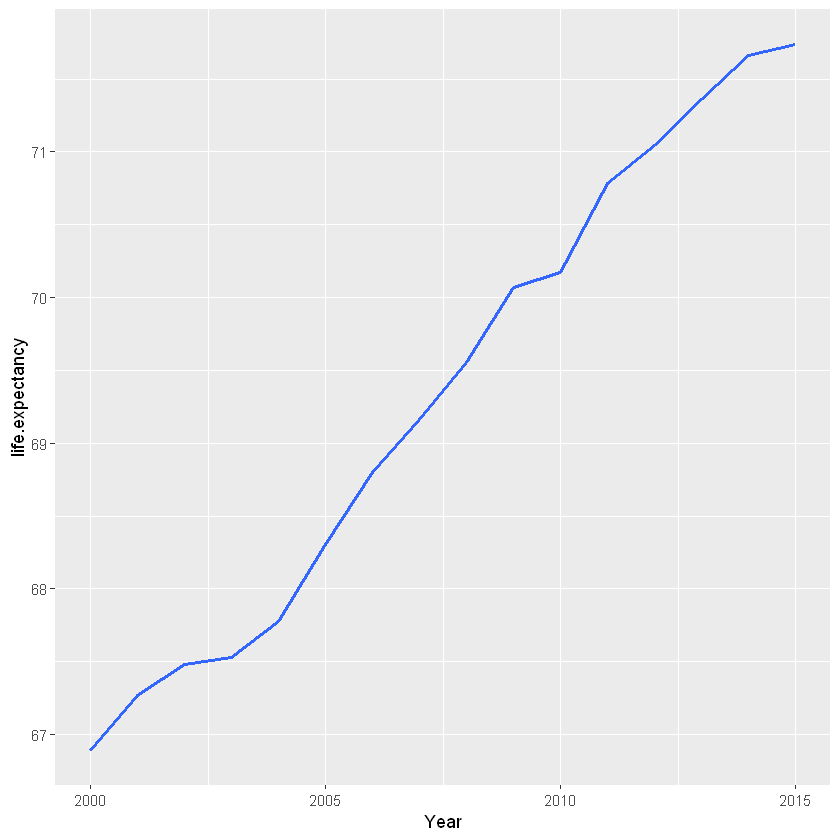

In [92]:
ggplot(gd, aes(x = Year, y = life.expectancy)) +
  geom_smooth(stat = "identity")

we notice an increase in the mean of life expectancy

we want to test whether it was because of improvements in health conditions

## Independence of observations

Use the cor() function to test the relationship between our independent variables and make sure they aren’t too highly correlated.

We consider cor>=60 to be highly correlated

In [93]:
colnames(health_df)

[1] "Country"              "Year"                 "Hepatitis.B"         
 [4] "Measles"              "BMI"                  "Polio"               
 [7] "Diphtheria"           "HIV.AIDS"             "thinness..1.19.years"
[10] "thinness.5.9.years"   "Adult.Mortality"      "infant.deaths"       
[13] "under.five.deaths"    "Life.expectancy"

In [94]:
#we chekc for the variables that we suspect to have a correlation
cor(health_df$thinness..1.19.years, health_df$thinness.5.9.years)

[1] 0.9389527

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


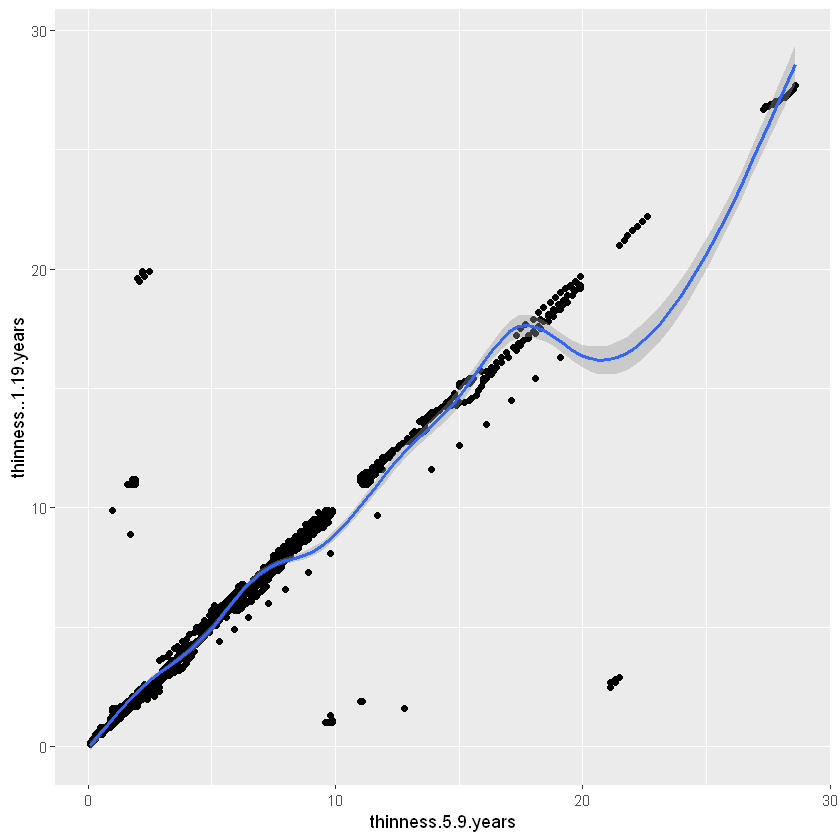

In [282]:
ggplot(health_df, aes(thinness.5.9.years, thinness..1.19.years)) + geom_point() + geom_smooth()

notice a linear relationship between the two variables

In [95]:
cor(health_df$thinness..1.19.years, health_df$BMI)

[1] -0.530805

In [96]:
cor(health_df$BMI, health_df$thinness.5.9.years)

[1] -0.5377842

In [97]:
cor(health_df$Polio, health_df$Diphtheria)

[1] 0.644162

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


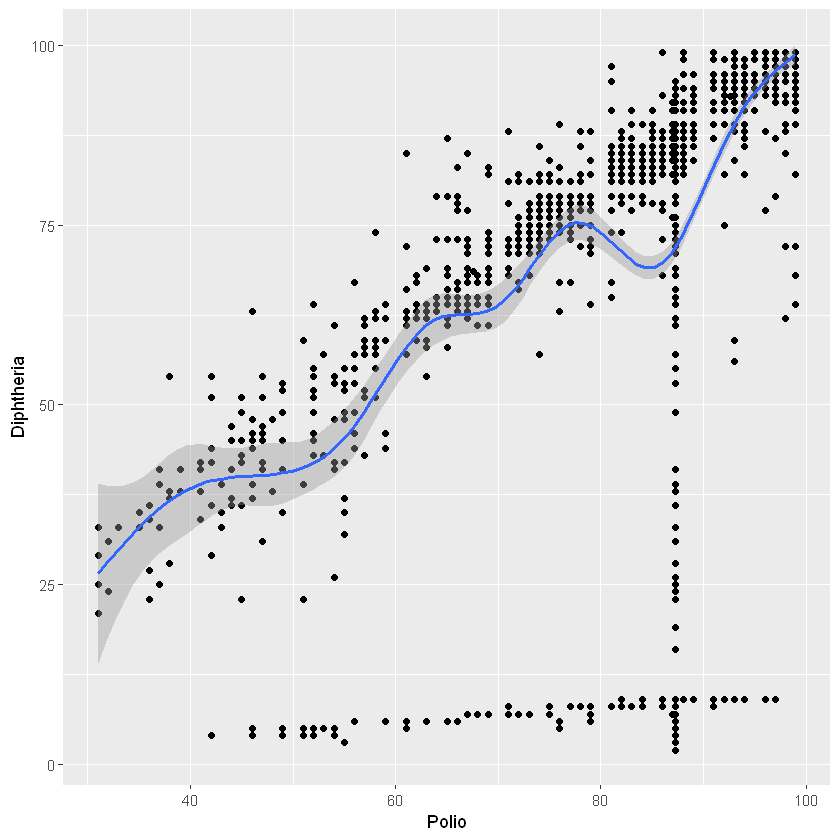

In [284]:
ggplot(health_df, aes(Polio, Diphtheria)) + geom_point() + geom_smooth()

The correlation is not that high, we see a pattern in teh plot but it's not exactly linear

In [98]:
cor(health_df$Polio, health_df$HIV.AIDS)

[1] -0.2111134

In [99]:
cor(health_df$Hepatitis.B, health_df$Measles)

[1] -0.1848782

In [100]:
cor(health_df$Polio, health_df$Hepatitis.B)

[1] 0.6414681

In [101]:
cor(health_df$infant.deaths, health_df$under.five.deaths)

[1] 0.9966359

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


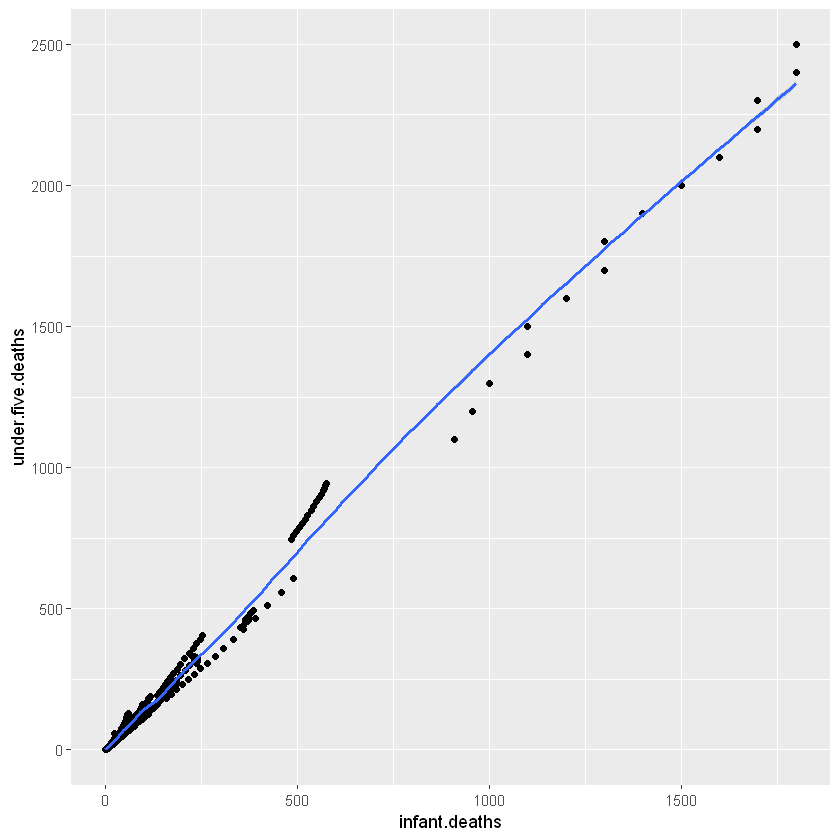

In [283]:
ggplot(health_df, aes(infant.deaths, under.five.deaths)) + geom_point() + geom_smooth()

notice a linear relationship between infant deaths and under five deaths, we can see the correlation through the graph

In [102]:
cor(health_df$infant.deaths, health_df$Adult.Mortality)

[1] 0.07865686

In [103]:
cor(health_df$HIV.AIDS, health_df$Adult.Mortality)

[1] 0.526491

we found high correlation between independent variables.

We will do statistical analysis to know which variables to drop and which to keep depending on teh p-value

## Normality

Use the hist() function to test whether our dependent variable follows a normal distribution.

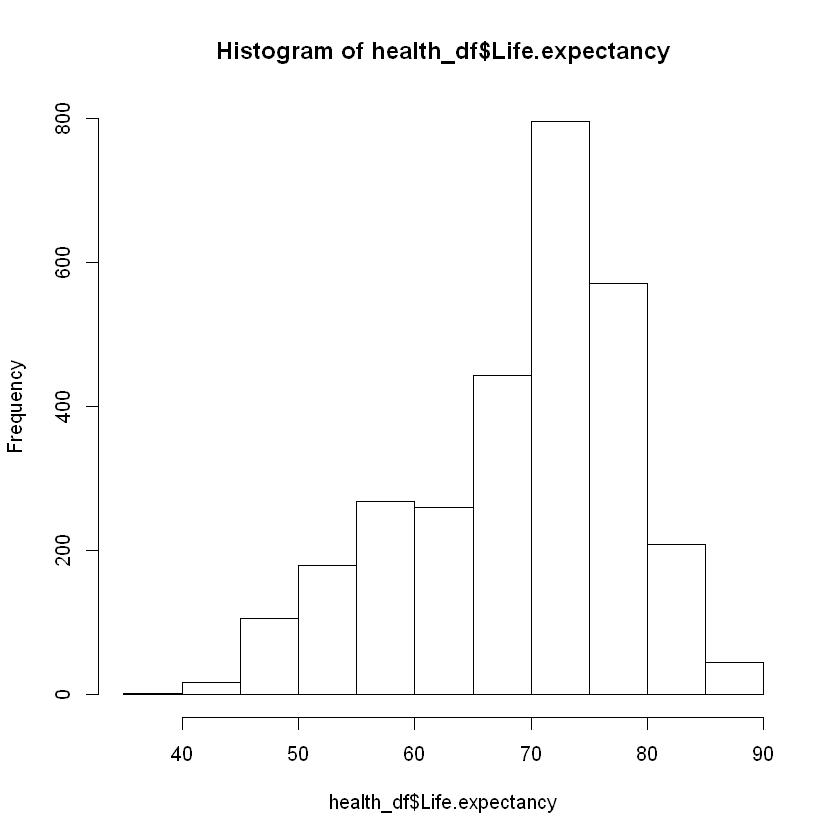

In [104]:
hist(health_df$Life.expectancy)

we can see that our independent variable does no follow a normal distribution, instead it's left skewed

Usually, there are 2 reasons why this issue(error does not follow a normal distribution) would occur:

* Dependent or independent variables are too non-normal(can see from skewness or kurtosis of the variable)
* Existence of a few outliers/extreme values which disrupt the model prediction

Since our code does not aim to improve the accuracy but rather to interpret our data, we will not fix the normality issue.

##### However, we would like to note that having a skewed predicted value means that our linear regression model will have a bad training accuracy because the data is far from the fitted line.

# Regression Model

## Multiple Linear Regression

In [105]:
mlm =lm(Life.expectancy~. - Country - Year,data=health_df )

In [106]:
colnames(health_df)

[1] "Country"              "Year"                 "Hepatitis.B"         
 [4] "Measles"              "BMI"                  "Polio"               
 [7] "Diphtheria"           "HIV.AIDS"             "thinness..1.19.years"
[10] "thinness.5.9.years"   "Adult.Mortality"      "infant.deaths"       
[13] "under.five.deaths"    "Life.expectancy"

In [107]:
summary(mlm)


Call:
lm(formula = Life.expectancy ~ . - Country - Year, data = health_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.7156  -2.7147   0.0374   2.9756  15.9737 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           5.517e+01  7.677e-01  71.863  < 2e-16 ***
Hepatitis.B          -1.570e-02  7.178e-03  -2.187   0.0288 *  
Measles              -1.954e-05  9.007e-06  -2.170   0.0301 *  
BMI                   8.829e-02  5.632e-03  15.676  < 2e-16 ***
Polio                 1.781e-01  1.016e-02  17.521  < 2e-16 ***
Diphtheria            3.646e-02  5.046e-03   7.226 6.34e-13 ***
HIV.AIDS             -4.255e-01  2.056e-02 -20.694  < 2e-16 ***
thinness..1.19.years -2.429e-01  5.894e-02  -4.122 3.87e-05 ***
thinness.5.9.years   -7.108e-02  5.836e-02  -1.218   0.2234    
Adult.Mortality      -2.546e-02  9.160e-04 -27.801  < 2e-16 ***
infant.deaths         9.554e-02  9.717e-03   9.832  < 2e-16 ***
under.five.deaths    -6.854e-02  7.19

we notice that thinness.5.9 -who was highly correlated with thinness..1.19.years- has a very large p-value.

Therefore, we drop this variable

In [108]:
mlm2 =lm(Life.expectancy~. - Country - Year - thinness.5.9.years,data=health_df )
summary(mlm2)


Call:
lm(formula = Life.expectancy ~ . - Country - Year - thinness.5.9.years, 
    data = health_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.7500  -2.7399   0.0366   2.9745  16.0396 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           5.512e+01  7.668e-01  71.886  < 2e-16 ***
Hepatitis.B          -1.551e-02  7.177e-03  -2.161   0.0308 *  
Measles              -1.922e-05  9.004e-06  -2.134   0.0329 *  
BMI                   8.917e-02  5.586e-03  15.964  < 2e-16 ***
Polio                 1.778e-01  1.016e-02  17.496  < 2e-16 ***
Diphtheria            3.643e-02  5.046e-03   7.220 6.63e-13 ***
HIV.AIDS             -4.260e-01  2.056e-02 -20.719  < 2e-16 ***
thinness..1.19.years -3.070e-01  2.652e-02 -11.577  < 2e-16 ***
Adult.Mortality      -2.551e-02  9.153e-04 -27.874  < 2e-16 ***
infant.deaths         9.481e-02  9.699e-03   9.775  < 2e-16 ***
under.five.deaths    -6.811e-02  7.187e-03  -9.476  < 2e-16 ***
---
Signif.

We have a good adjusted R-squared of 0.7465.

Next, we are going to try to remove the two variables with the less significant p-values and see if our model improves.

In [172]:
mlm3 =lm(Life.expectancy~. - Country - Year -Hepatitis.B -Measles  - thinness.5.9.years + 
         infant.deaths:under.five.deaths,data=health_df )
summary(mlm3)


Call:
lm(formula = Life.expectancy ~ . - Country - Year - Hepatitis.B - 
    Measles - thinness.5.9.years + infant.deaths:under.five.deaths, 
    data = health_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.9785  -2.7415   0.0159   2.9588  15.6755 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.552e+01  7.576e-01  73.293  < 2e-16 ***
BMI                              8.421e-02  5.595e-03  15.051  < 2e-16 ***
Polio                            1.653e-01  9.078e-03  18.211  < 2e-16 ***
Diphtheria                       3.314e-02  4.944e-03   6.704 2.43e-11 ***
HIV.AIDS                        -4.284e-01  2.042e-02 -20.983  < 2e-16 ***
thinness..1.19.years            -3.054e-01  2.628e-02 -11.621  < 2e-16 ***
Adult.Mortality                 -2.529e-02  9.070e-04 -27.877  < 2e-16 ***
infant.deaths                    7.621e-02  9.993e-03   7.626 3.25e-14 ***
under.five.deaths               -6.391e-0

After removing the two variables, we are left with adjusted R-squared of 0.7495, in order not to overfit our model. we choose this model over the previous one.

We should check that our model is actually a good fit for the data, and that we don’t have large variation in the model error

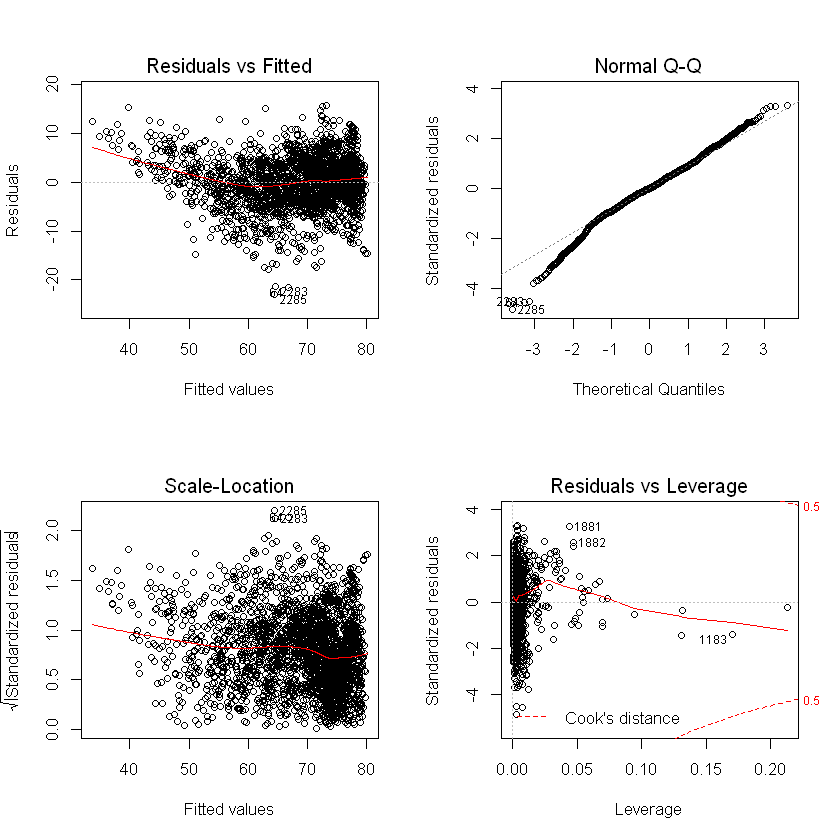

In [173]:
par(mfrow=c(2,2))
plot(mlm3)
par(mfrow=c(1,1))

the red lines representing the mean of the residuals are not horizontal and centered around zero. This means there are  outliers or biases in the data, that would make our linear regression invalid.

This was expected since our dependent variable is not normally distributed. 

# Simple Linear Regression

Let's find our how HIV.AIDS, thinness..1.19.years, and Polio affect life expectancy

Let's plot them

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


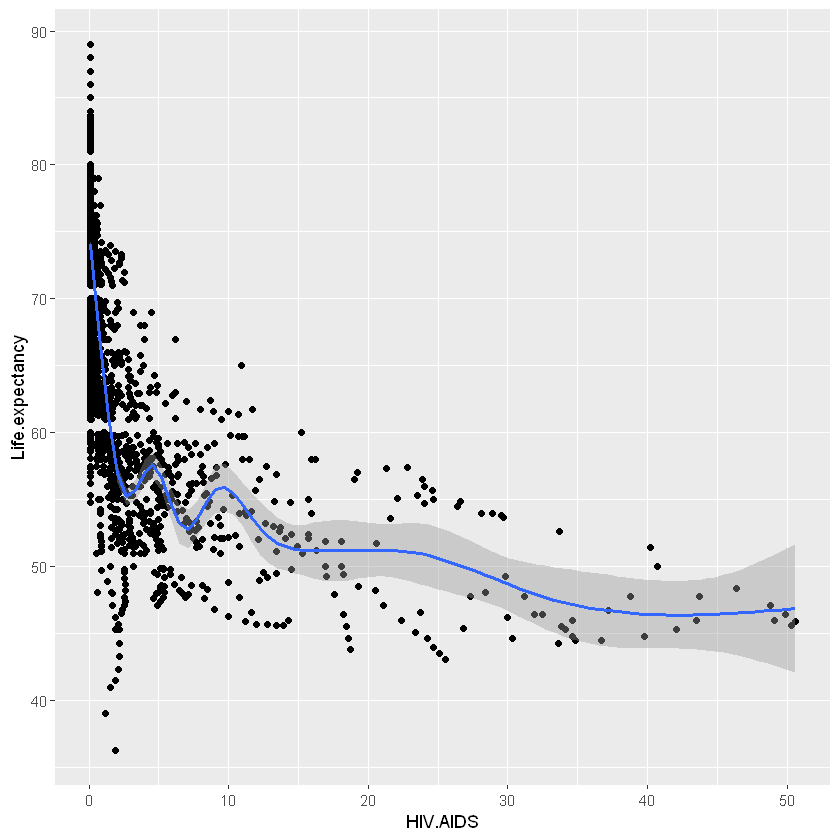

In [285]:
ggplot(health_df, aes(HIV.AIDS, Life.expectancy)) + geom_point() + geom_smooth()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


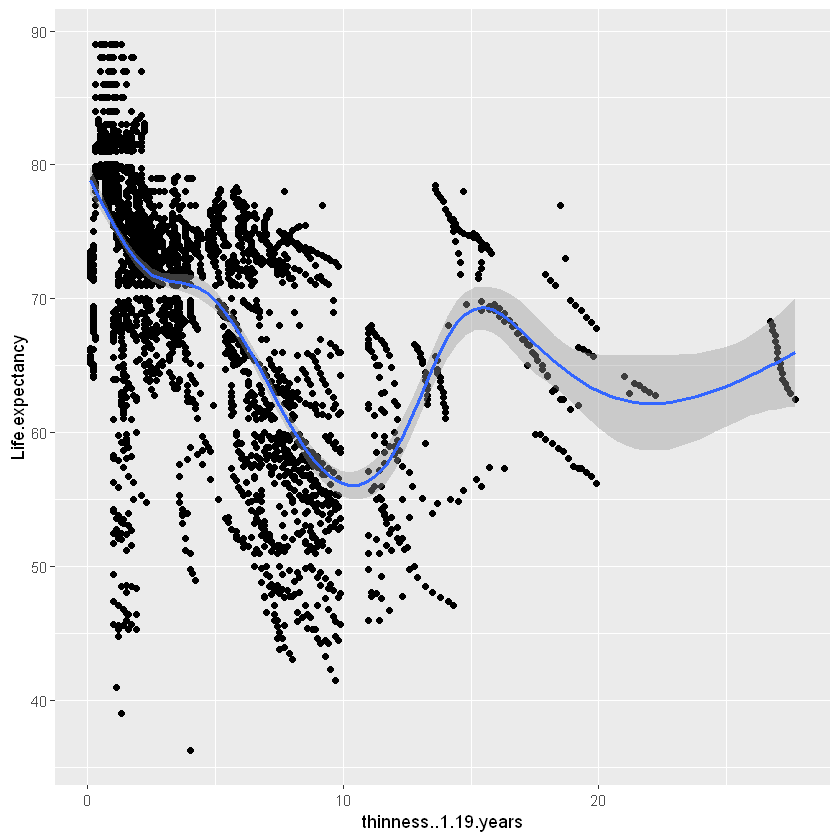

In [286]:
ggplot(health_df, aes(thinness..1.19.years, Life.expectancy)) + geom_point() + geom_smooth()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


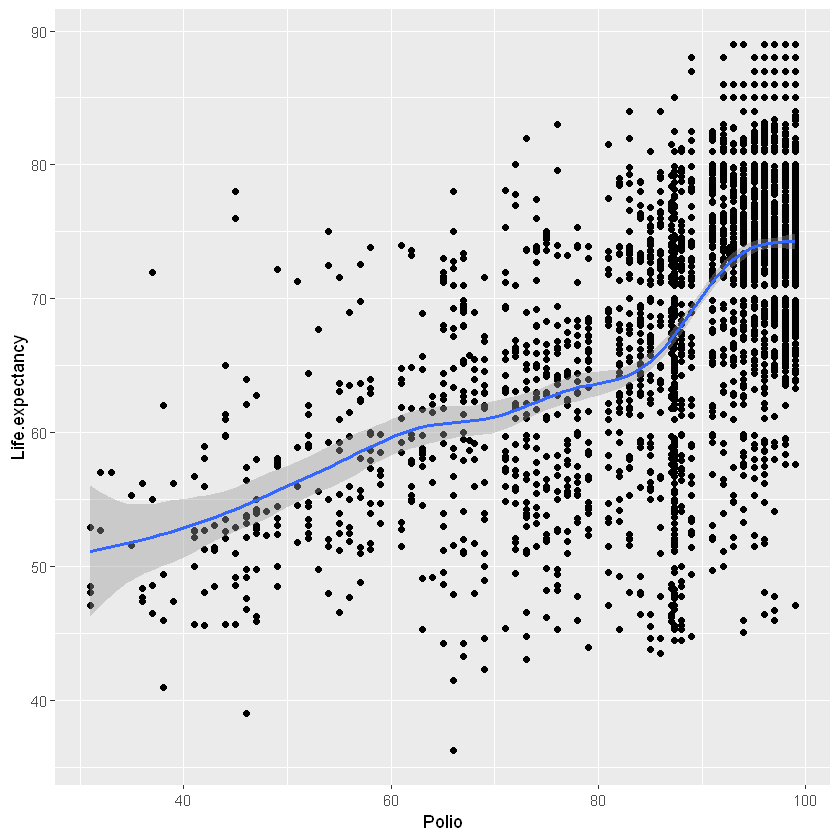

In [287]:
ggplot(health_df, aes(Polio, Life.expectancy)) + geom_point() + geom_smooth()

We don't see any linear relationship with the target value

##### HIV

In [111]:
hiv.fit <- lm(Life.expectancy ~ HIV.AIDS, data = health_df)
summary(hiv.fit)


Call:
lm(formula = Life.expectancy ~ HIV.AIDS, data = health_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.890  -5.261   1.580   5.039  27.346 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 71.16523    0.15438  460.97   <2e-16 ***
HIV.AIDS    -1.03975    0.02859  -36.36   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.862 on 2894 degrees of freedom
Multiple R-squared:  0.3136,	Adjusted R-squared:  0.3134 
F-statistic:  1322 on 1 and 2894 DF,  p-value: < 2.2e-16


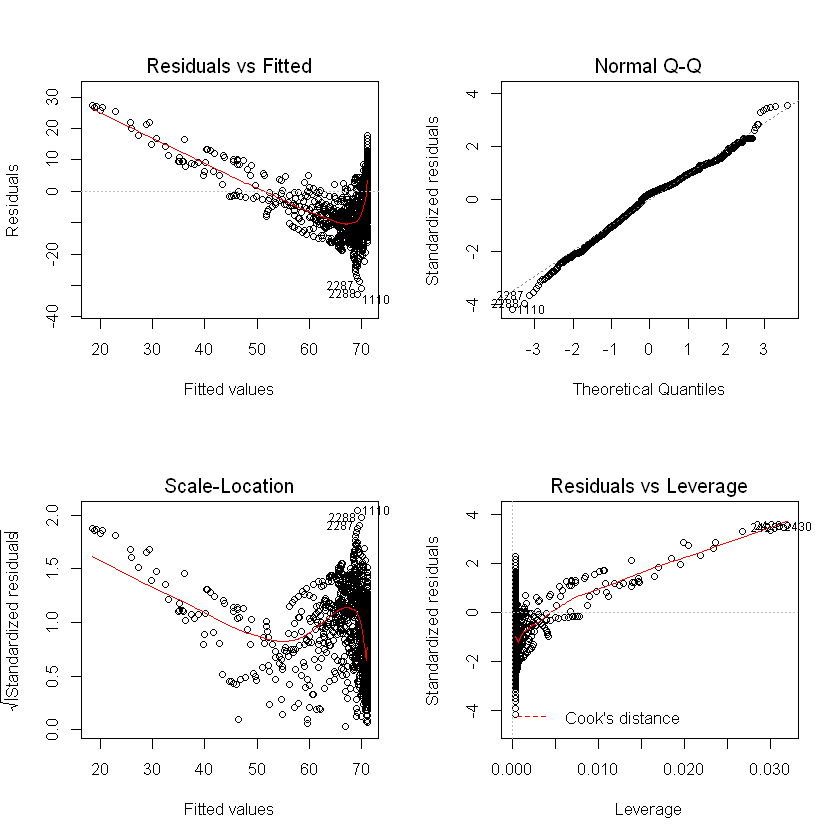

In [112]:
par(mfrow=c(2,2))
plot(hiv.fit)
par(mfrow=c(1,1))

We have many points with high leverage, noise, and possible outliers. 
The plot shows a detection of, unequal error variances, and some outliers.

#### thinness..1.19.years

In [113]:
#we try for thinness..1.19.years 
th.fit <- lm(Life.expectancy ~ thinness..1.19.years, data = health_df)
summary(th.fit)


Call:
lm(formula = Life.expectancy ~ thinness..1.19.years, data = health_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.987  -5.070   1.732   5.699  21.628 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          74.31828    0.23008  323.01   <2e-16 ***
thinness..1.19.years -1.02413    0.03506  -29.21   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.339 on 2894 degrees of freedom
Multiple R-squared:  0.2277,	Adjusted R-squared:  0.2274 
F-statistic: 853.3 on 1 and 2894 DF,  p-value: < 2.2e-16


We have a low adjusted R-squared, let's plot the model

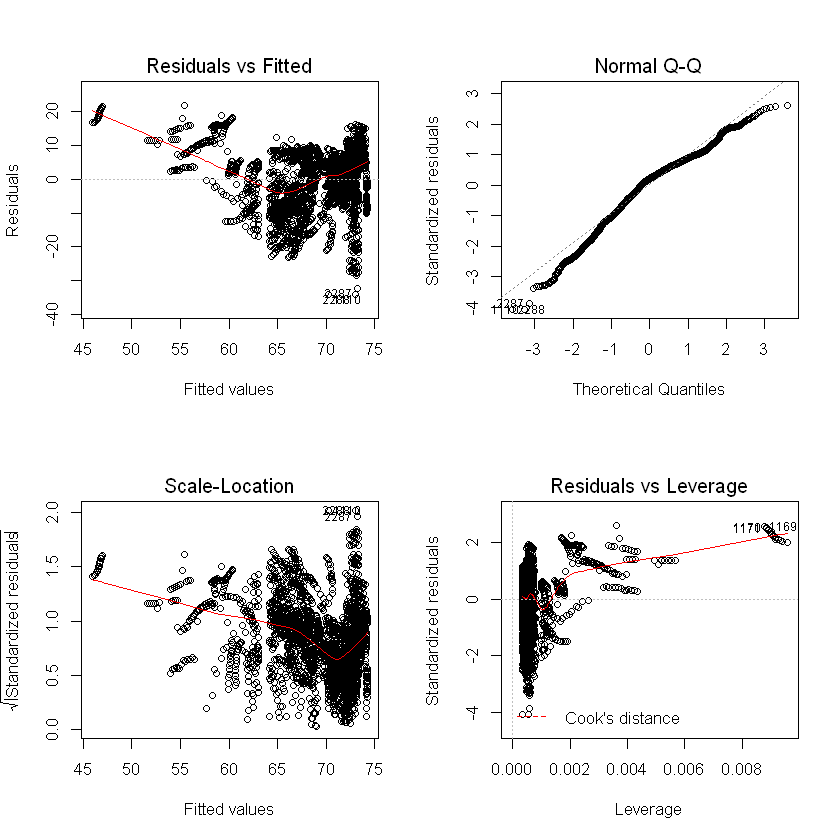

In [114]:
par(mfrow=c(2,2))
plot(th.fit)
par(mfrow=c(1,1))

We can see that the relationship between our variables and the dependent variable is non-linear

#### Polio

In [115]:
#we try for Polio 
polio.fit <- lm(Life.expectancy ~ Polio, data = health_df)
summary(polio.fit)


Call:
lm(formula = Life.expectancy ~ Polio, data = health_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.2900  -4.1708   0.8844   4.8850  26.1767 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.24628    0.92231   36.05   <2e-16 ***
Polio        0.41282    0.01042   39.62   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.641 on 2894 degrees of freedom
Multiple R-squared:  0.3516,	Adjusted R-squared:  0.3514 
F-statistic:  1570 on 1 and 2894 DF,  p-value: < 2.2e-16


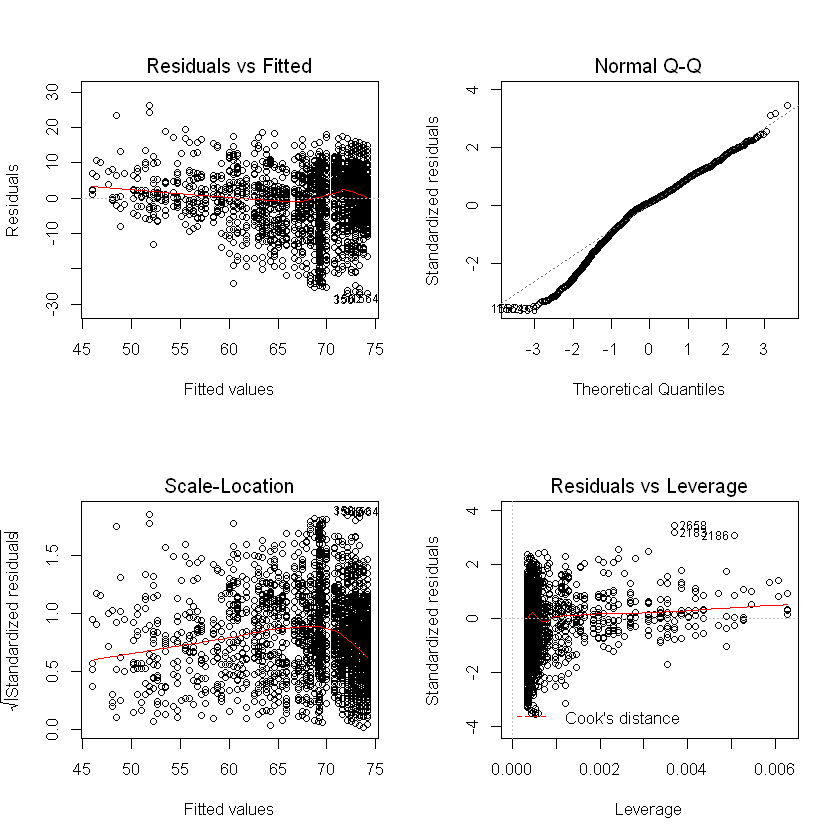

In [116]:
par(mfrow=c(2,2))
plot(polio.fit)
par(mfrow=c(1,1))

We have an adjusted R-squared of 0.3514 which is higher than the other simple regression models.

In addition, the distribution of the residuals seems to look better than the previous model. We can still detect high leverage points and outliers

#### The data is non-linear, we need a non-linear model like nls() 

# Conclusion


<strong>
We have several errors in the data that resulted in unequal-error variances
    </strong>

# Economic Dataset

In this section we are going to inspect the effect of economic factors on life expectancy

###### let's see our data

In [117]:
econ_df

,Country,Year,Status,percentage.expenditure,Total.expenditure,GDP,Population,Income.composition.of.resources,Life.expectancy
1,Afghanistan,2015,Developing,71.279624,8.16,584.25921,33736494,0.479,65.0
2,Afghanistan,2014,Developing,73.523582,8.18,612.69651,327582,0.476,59.9
3,Afghanistan,2013,Developing,73.219243,8.13,631.74498,31731688,0.470,59.9
4,Afghanistan,2012,Developing,78.184215,8.52,669.95900,3696958,0.463,59.5
5,Afghanistan,2011,Developing,7.097109,7.87,63.53723,2978599,0.454,59.2
6,Afghanistan,2010,Developing,79.679367,9.20,553.32894,2883167,0.448,58.8
7,Afghanistan,2009,Developing,56.762217,9.42,445.89330,284331,0.434,58.6
8,Afghanistan,2008,Developing,25.873925,8.33,373.36112,2729431,0.433,58.1
9,Afghanistan,2007,Developing,10.910156,6.73,369.83580,26616792,0.415,57.5
10,Afghanistan,2006,Developing,17.171518,7.43,272.56377,2589345,0.405,57.3


In [118]:
econ_df[econ_df$Income.composition.of.resources == 0,]

,Country,Year,Status,percentage.expenditure,Total.expenditure,GDP,Population,Income.composition.of.resources,Life.expectancy
294,Bhutan,2010,Developing,244.039195,5.17,2178.92138,727641,0,67.9
295,Bhutan,2009,Developing,27.489070,6.30,177.23450,714458,0,67.4
296,Bhutan,2008,Developing,302.667579,6.58,1795.18137,795,0,67.0
297,Bhutan,2007,Developing,283.806236,5.88,1741.14255,686958,0,66.5
298,Bhutan,2006,Developing,169.202397,5.27,1335.45696,672228,0,65.8
299,Bhutan,2005,Developing,145.596544,5.28,1247.61392,656639,0,65.0
300,Bhutan,2004,Developing,2.586698,4.41,197.45788,64282,0,64.2
301,Bhutan,2003,Developing,19.156641,4.90,997.74171,623434,0,63.3
302,Bhutan,2002,Developing,151.975519,7.75,885.63822,66399,0,62.5
303,Bhutan,2001,Developing,8.574030,5.91,87.93877,5896,0,61.7


We notice that we have 91 observations with Income.composition.of.resources = 0, aka missing values

Hence, we are going to remove these obervations since we do not have values to fill them with.

In [119]:
econ_df <- econ_df[df$Income.composition.of.resources != 0,]

Let's visualize our features

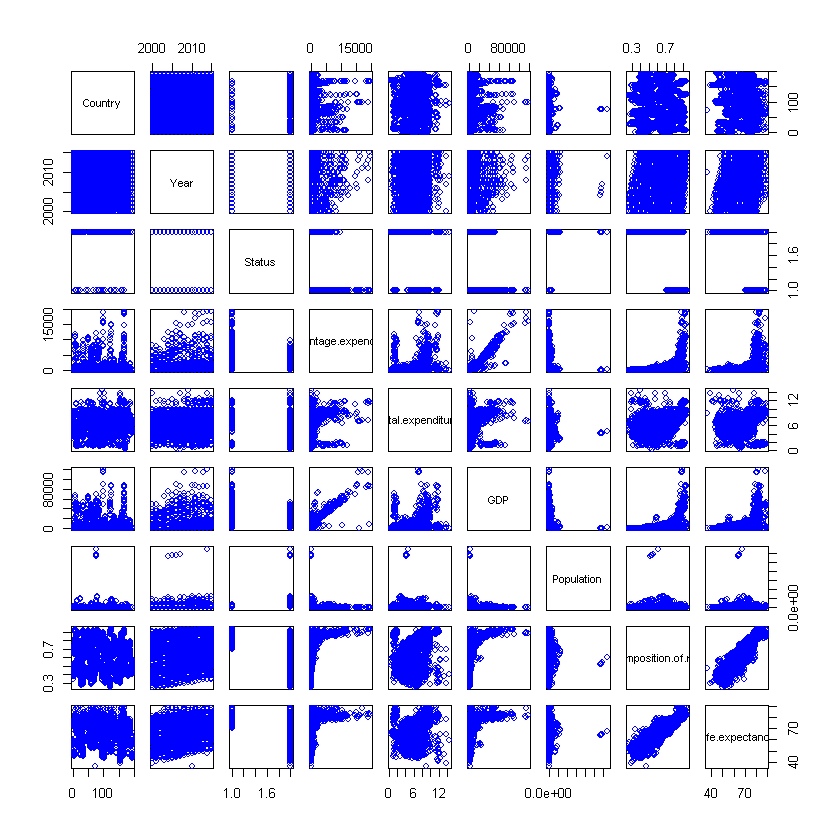

In [120]:
pairs(econ_df, col="blue")

We can detect a couple of points far from the group in the population vs. life expectancy

Let's plot it seperately to see them better and check if they were outliers

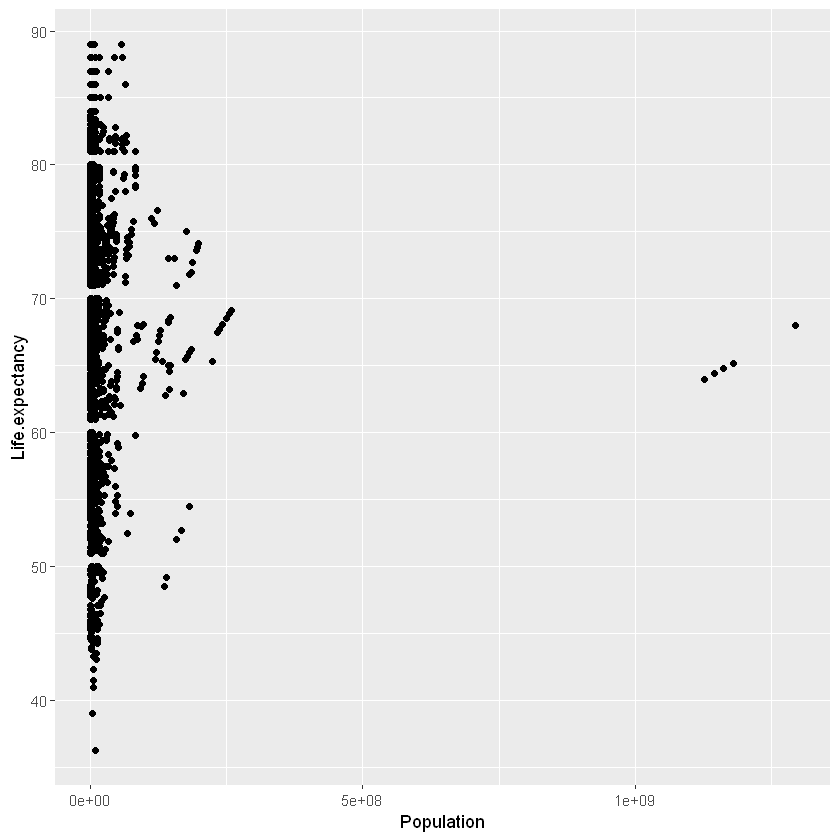

In [121]:
ggplot(econ_df, aes(Population, Life.expectancy)) + geom_point() 

In [122]:
econ_df[econ_df$Population > 5e+08,]

,Country,Year,Status,percentage.expenditure,Total.expenditure,GDP,Population,Income.composition.of.resources,Life.expectancy
1170,India,2014,Developing,86.521539,4.69,1573.1189,1293859294,0.607,68.0
1177,India,2007,Developing,5.234770,4.23,118.1664,1179681239,0.546,65.2
1178,India,2006,Developing,34.859427,4.25,792.2597,1161977719,0.536,64.8
1179,India,2005,Developing,3.509637,4.28,77.8190,1144118674,0.526,64.4
1180,India,2004,Developing,27.338009,4.22,621.3184,1126135777,0.518,64.0


Let's look at the entire population of India over the years

In [123]:
econ_df[econ_df$Country == "India",]

,Country,Year,Status,percentage.expenditure,Total.expenditure,GDP,Population,Income.composition.of.resources,Life.expectancy
1169,India,2015,Developing,77.0969217,4.61,1613.18878,1395398,0.615,68.3
1170,India,2014,Developing,86.5215389,4.69,1573.11889,1293859294,0.607,68.0
1171,India,2013,Developing,67.6723044,4.53,1452.19537,127856227,0.599,67.6
1172,India,2012,Developing,64.9696449,4.39,1446.98541,126365852,0.590,67.3
1173,India,2011,Developing,64.6059005,4.33,1461.67196,124723629,0.580,66.8
1174,India,2010,Developing,57.7335986,4.28,1345.77153,12398691,0.569,66.4
1175,India,2009,Developing,0.8441863,4.38,19.31777,121427132,0.563,66.0
1176,India,2008,Developing,43.0304331,4.34,991.48463,119714696,0.556,65.5
1177,India,2007,Developing,5.2347703,4.23,118.16637,1179681239,0.546,65.2
1178,India,2006,Developing,34.8594267,4.25,792.25970,1161977719,0.536,64.8


Okay so those values were not the outliers, but the rest of them were errors
it can be clearly seen that the data is erroneous, for example, we notice that the population of India went from 1.2 billion to 1.3 million. and we do not recall a nuclear war in 2015.

We will try to fix this generating a value for each obviously erroneous value

We will try to make them similar in the degrees of 10.

i.e:

2017: 1000

2016: 90

we will try to fix the value for 2016 to become 900, as that would be the closest approximation for the actual value

Since our data is messed up in different shape, we will fix each wrong value manually

In [124]:
econ_df[econ_df$Country == "India" & econ_df$Year == 2015, "Population"] <- econ_df[econ_df$Country == "India" & econ_df$Year == 2015, "Population"] * 1000
econ_df[econ_df$Country == "India" & econ_df$Year == 2013, "Population"] <- econ_df[econ_df$Country == "India" & econ_df$Year == 2013, "Population"] * 10
econ_df[econ_df$Country == "India" & econ_df$Year == 2012, "Population"] <- econ_df[econ_df$Country == "India" & econ_df$Year == 2012, "Population"] * 10
econ_df[econ_df$Country == "India" & econ_df$Year == 2011, "Population"] <- econ_df[econ_df$Country == "India" & econ_df$Year == 2011, "Population"] * 10
econ_df[econ_df$Country == "India" & econ_df$Year == 2010, "Population"] <- econ_df[econ_df$Country == "India" & econ_df$Year == 2010, "Population"] * 100
econ_df[econ_df$Country == "India" & econ_df$Year == 2009, "Population"] <- econ_df[econ_df$Country == "India" & econ_df$Year == 2009, "Population"] * 10
econ_df[econ_df$Country == "India" & econ_df$Year == 2008, "Population"] <- econ_df[econ_df$Country == "India" & econ_df$Year == 2008, "Population"] * 10
econ_df[econ_df$Country == "India" & econ_df$Year == 2003, "Population"] <- econ_df[econ_df$Country == "India" & econ_df$Year == 2003, "Population"] * 100
econ_df[econ_df$Country == "India" & econ_df$Year == 2002, "Population"] <- econ_df[econ_df$Country == "India" & econ_df$Year == 2002, "Population"] * 100
econ_df[econ_df$Country == "India" & econ_df$Year == 2001, "Population"] <- econ_df[econ_df$Country == "India" & econ_df$Year == 2001, "Population"] * 10
econ_df[econ_df$Country == "India" & econ_df$Year == 2000, "Population"] <- econ_df[econ_df$Country == "India" & econ_df$Year == 2000, "Population"] * 1000


In [125]:
econ_df[econ_df$Country == "India",]

,Country,Year,Status,percentage.expenditure,Total.expenditure,GDP,Population,Income.composition.of.resources,Life.expectancy
1169,India,2015,Developing,77.0969217,4.61,1613.18878,1395398000,0.615,68.3
1170,India,2014,Developing,86.5215389,4.69,1573.11889,1293859294,0.607,68.0
1171,India,2013,Developing,67.6723044,4.53,1452.19537,1278562270,0.599,67.6
1172,India,2012,Developing,64.9696449,4.39,1446.98541,1263658520,0.590,67.3
1173,India,2011,Developing,64.6059005,4.33,1461.67196,1247236290,0.580,66.8
1174,India,2010,Developing,57.7335986,4.28,1345.77153,1239869100,0.569,66.4
1175,India,2009,Developing,0.8441863,4.38,19.31777,1214271320,0.563,66.0
1176,India,2008,Developing,43.0304331,4.34,991.48463,1197146960,0.556,65.5
1177,India,2007,Developing,5.2347703,4.23,118.16637,1179681239,0.546,65.2
1178,India,2006,Developing,34.8594267,4.25,792.25970,1161977719,0.536,64.8


let's plot it again

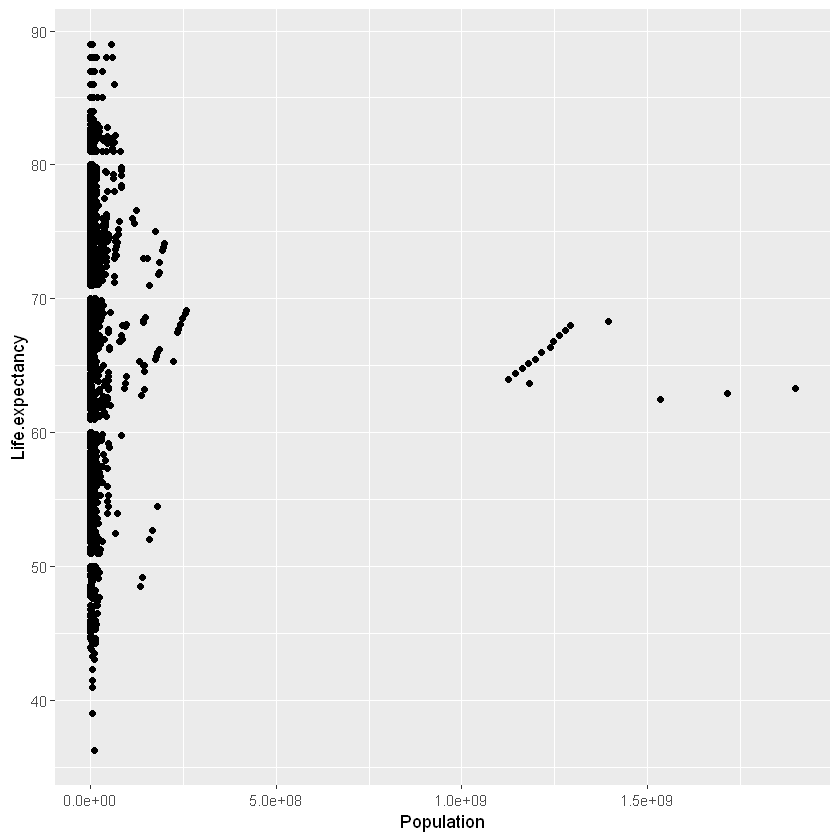

In [126]:
ggplot(econ_df, aes(Population, Life.expectancy)) + geom_point() 

# Correlation between independent variables

In [127]:
colnames(econ_df)

[1] "Country"                         "Year"                           
[3] "Status"                          "percentage.expenditure"         
[5] "Total.expenditure"               "GDP"                            
[7] "Population"                      "Income.composition.of.resources"
[9] "Life.expectancy"

Let's investigate the correlation between the independent variables

In [128]:
#percentage.expenditure and Total.expenditure
cor(econ_df$percentage.expenditure, econ_df$Total.expenditure)

[1] 0.2430272

In [129]:
#GDP and Population
cor(econ_df$GDP, econ_df$Population)

[1] -0.0412226

In [130]:
#Total.expenditure and Population
cor(econ_df$Total.expenditure, econ_df$Population)

[1] -0.08476422

In [131]:
#Total.expenditure and Population
cor(econ_df$Total.expenditure, econ_df$Income.composition.of.resources)

[1] 0.2532827

We notice no correlation between the independent variables

# Linear Regression Model

## Multiple linear regression

In [132]:
lm.fit <- lm(Life.expectancy ~. -Year -Country, data = econ_df)

In [133]:
summary(lm.fit)


Call:
lm(formula = Life.expectancy ~ . - Year - Country, data = econ_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.5738  -2.0777   0.4671   2.7095  16.0980 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      3.387e+01  6.962e-01  48.651  < 2e-16 ***
StatusDeveloping                 6.328e-01  3.247e-01   1.949  0.05146 .  
percentage.expenditure           3.054e-04  1.078e-04   2.833  0.00466 ** 
Total.expenditure                4.727e-02  4.316e-02   1.095  0.27352    
GDP                             -5.664e-05  1.867e-05  -3.033  0.00245 ** 
Population                       1.117e-09  8.354e-10   1.337  0.18140    
Income.composition.of.resources  5.312e+01  7.654e-01  69.392  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.508 on 2155 degrees of freedom
Multiple R-squared:  0.7892,	Adjusted R-squared:  0.7886 
F-statistic:  1345 on 6

We have really high p-values, let's try using one predictor at a time since we do not have many

In [134]:
#using percentage.expenditure
simple.pe.fit <- lm(Life.expectancy~ percentage.expenditure, data = econ_df)
summary(simple.pe.fit)


Call:
lm(formula = Life.expectancy ~ percentage.expenditure, data = econ_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.078  -5.454   2.098   6.230  21.570 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            6.731e+01  2.059e-01  326.96   <2e-16 ***
percentage.expenditure 1.824e-03  8.275e-05   22.04   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.861 on 2160 degrees of freedom
Multiple R-squared:  0.1837,	Adjusted R-squared:  0.1833 
F-statistic:   486 on 1 and 2160 DF,  p-value: < 2.2e-16


very small p value but the R sqaured is very low 

In [135]:
#using Total.expenditure
simple.te.fit <- lm(Life.expectancy~ Total.expenditure, data = econ_df)
summary(simple.te.fit)


Call:
lm(formula = Life.expectancy ~ Total.expenditure, data = econ_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.306  -5.777   2.307   6.562  24.413 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       63.19208    0.56438   112.0   <2e-16 ***
Total.expenditure  0.96217    0.08667    11.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.539 on 2160 degrees of freedom
Multiple R-squared:  0.05398,	Adjusted R-squared:  0.05354 
F-statistic: 123.3 on 1 and 2160 DF,  p-value: < 2.2e-16


The R-squared is even lower and the F-stat is not good at all

In [136]:
#using GDP
simple.gdp.fit <- lm(Life.expectancy~ GDP, data = econ_df)
summary(simple.gdp.fit)


Call:
lm(formula = Life.expectancy ~ GDP, data = econ_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.674  -5.096   1.811   5.951  22.107 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.676e+01  2.087e-01   319.9   <2e-16 ***
GDP         3.304e-04  1.354e-05    24.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.683 on 2160 degrees of freedom
Multiple R-squared:  0.2161,	Adjusted R-squared:  0.2157 
F-statistic: 595.4 on 1 and 2160 DF,  p-value: < 2.2e-16


Better results than the previous ones

In [137]:
#using Population
simple.pop.fit <- lm(Life.expectancy~ Population, data = econ_df)
summary(simple.pop.fit)


Call:
lm(formula = Life.expectancy ~ Population, data = econ_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.758  -6.383   2.645   6.642  20.080 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.909e+01  2.138e-01 323.114   <2e-16 ***
Population  -2.887e-09  1.809e-09  -1.596    0.111    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.801 on 2160 degrees of freedom
Multiple R-squared:  0.001178,	Adjusted R-squared:  0.0007153 
F-statistic: 2.547 on 1 and 2160 DF,  p-value: 0.1107


We can assume that Population is a bad estimate for life.expectancy

In [138]:
#using Income.composition.of.resources
simple.icr.fit <- lm(Life.expectancy~ Income.composition.of.resources, data = econ_df)
summary(simple.icr.fit)


Call:
lm(formula = Life.expectancy ~ Income.composition.of.resources, 
    data = econ_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.4731  -2.1056   0.4901   2.7093  15.9196 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      35.3886     0.3883   91.15   <2e-16 ***
Income.composition.of.resources  51.8821     0.5797   89.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.52 on 2160 degrees of freedom
Multiple R-squared:  0.7876,	Adjusted R-squared:  0.7875 
F-statistic:  8009 on 1 and 2160 DF,  p-value: < 2.2e-16


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


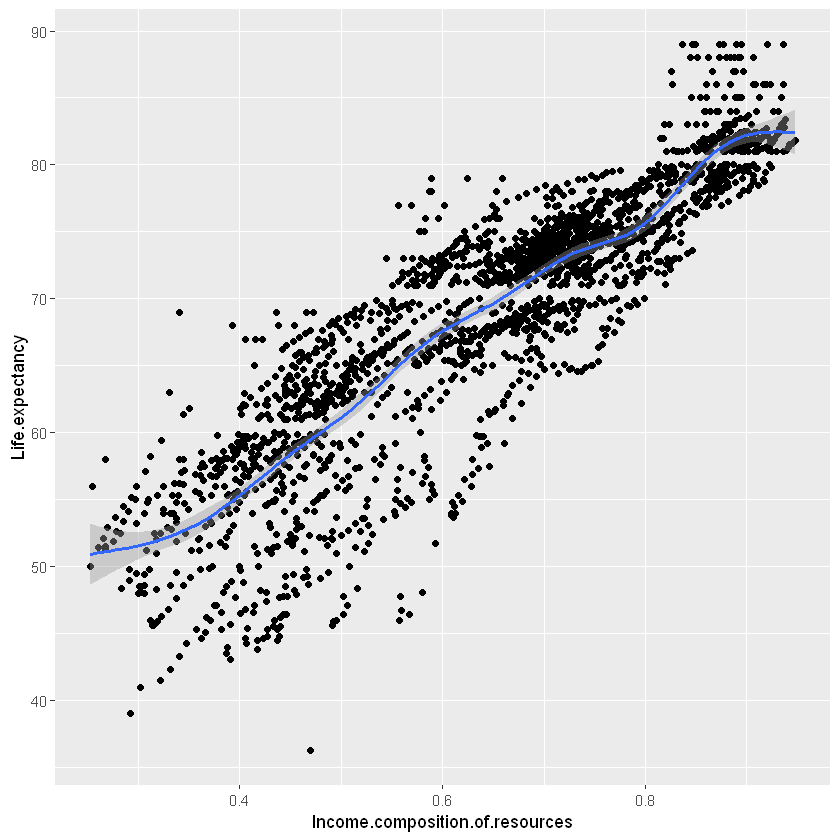

In [288]:
ggplot(econ_df, aes(Income.composition.of.resources, Life.expectancy)) + geom_point() + geom_smooth()

notice from the scatter plot that there is a linear relationship between Income.composition.of.resources and life expectancy, and We can say from our model that Income.composition.of.resources is a good predictor for life.expectancy

Let's try adding some features and test the performance of our model

In [139]:
#using Income.composition.of.resources + GDP
multi.lm <- lm(Life.expectancy~ Income.composition.of.resources + GDP, data = econ_df)
summary(multi.lm)


Call:
lm(formula = Life.expectancy ~ Income.composition.of.resources + 
    GDP, data = econ_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.4499  -2.1321   0.5199   2.7221  16.0182 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      3.509e+01  4.291e-01  81.770   <2e-16 ***
Income.composition.of.resources  5.249e+01  6.881e-01  76.283   <2e-16 ***
GDP                             -1.375e-05  8.365e-06  -1.644      0.1    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.518 on 2159 degrees of freedom
Multiple R-squared:  0.7879,	Adjusted R-squared:  0.7877 
F-statistic:  4009 on 2 and 2159 DF,  p-value: < 2.2e-16


<strong>
Clearly, no.
    </strong>

In [140]:
#using Income.composition.of.resources + Population
multi.lm2 <- lm(Life.expectancy~ Income.composition.of.resources + Population, data = econ_df)
summary(multi.lm2)


Call:
lm(formula = Life.expectancy ~ Income.composition.of.resources + 
    Population, data = econ_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.4550  -2.1196   0.4418   2.7227  15.9338 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     3.534e+01  3.899e-01  90.633   <2e-16 ***
Income.composition.of.resources 5.192e+01  5.805e-01  89.452   <2e-16 ***
Population                      1.106e-09  8.351e-10   1.325    0.185    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.519 on 2159 degrees of freedom
Multiple R-squared:  0.7878,	Adjusted R-squared:  0.7876 
F-statistic:  4007 on 2 and 2159 DF,  p-value: < 2.2e-16


<strong>
Clearly, no
    </strong>
    
    
    (because we have a high P-value)

In [141]:
#using Income.composition.of.resources + Total.expenditure
multi.lm3 <- lm(Life.expectancy~ Income.composition.of.resources + Total.expenditure, data = econ_df)
summary(multi.lm3)


Call:
lm(formula = Life.expectancy ~ Income.composition.of.resources + 
    Total.expenditure, data = econ_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.5893  -2.0931   0.4837   2.7147  15.8884 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     35.26315    0.41964  84.032   <2e-16 ***
Income.composition.of.resources 51.76248    0.59932  86.368   <2e-16 ***
Total.expenditure                0.03346    0.04245   0.788    0.431    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.52 on 2159 degrees of freedom
Multiple R-squared:  0.7877,	Adjusted R-squared:  0.7875 
F-statistic:  4004 on 2 and 2159 DF,  p-value: < 2.2e-16


<strong>
simply, no.
    </strong>

In [142]:
#using Income.composition.of.resources + percentage.expenditure
multi.lm4 <- lm(Life.expectancy~ Income.composition.of.resources + percentage.expenditure, data = econ_df)
summary(multi.lm4)


Call:
lm(formula = Life.expectancy ~ Income.composition.of.resources + 
    percentage.expenditure, data = econ_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.470  -2.116   0.485   2.708  15.932 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      3.535e+01  4.212e-01  83.931   <2e-16 ***
Income.composition.of.resources  5.195e+01  6.631e-01  78.351   <2e-16 ***
percentage.expenditure          -1.068e-05  4.828e-05  -0.221    0.825    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.521 on 2159 degrees of freedom
Multiple R-squared:  0.7876,	Adjusted R-squared:  0.7874 
F-statistic:  4003 on 2 and 2159 DF,  p-value: < 2.2e-16


<strong>
    no.
    </strong>

##### Let's try a polynomial regression model

In [143]:
#using Income.composition.of.resources
simple.icr.fit.poly <- lm(Life.expectancy~ poly(Income.composition.of.resources, 3), data = econ_df)
summary(simple.icr.fit.poly)


Call:
lm(formula = Life.expectancy ~ poly(Income.composition.of.resources, 
    3), data = econ_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.4346  -2.1035   0.4971   2.7011  16.2401 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                69.02923    0.09714 710.627   <2e-16
poly(Income.composition.of.resources, 3)1 404.49504    4.51668  89.556   <2e-16
poly(Income.composition.of.resources, 3)2  -9.70553    4.51668  -2.149   0.0318
poly(Income.composition.of.resources, 3)3  -2.76924    4.51668  -0.613   0.5399
                                             
(Intercept)                               ***
poly(Income.composition.of.resources, 3)1 ***
poly(Income.composition.of.resources, 3)2 *  
poly(Income.composition.of.resources, 3)3    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.517 on 2158 degrees of freedom
Multiple R-squared:  0.7

It does not show any improvements to the model, we stick to our simple linear regression model of degree 1 (we can tell from teh graph as well)

# Social dataset

###### Let's have a look at our dataset

In [181]:
social_df[1:5,]

Country,Year,Adult.Mortality,infant.deaths,Alcohol,Schooling,under.five.deaths,Life.expectancy
Afghanistan,2015,263,62,0.01,10.1,83,65.0
Afghanistan,2014,271,64,0.01,10.0,86,59.9
Afghanistan,2013,268,66,0.01,9.9,89,59.9
Afghanistan,2012,272,69,0.01,9.8,93,59.5
Afghanistan,2011,275,71,0.01,9.5,97,59.2


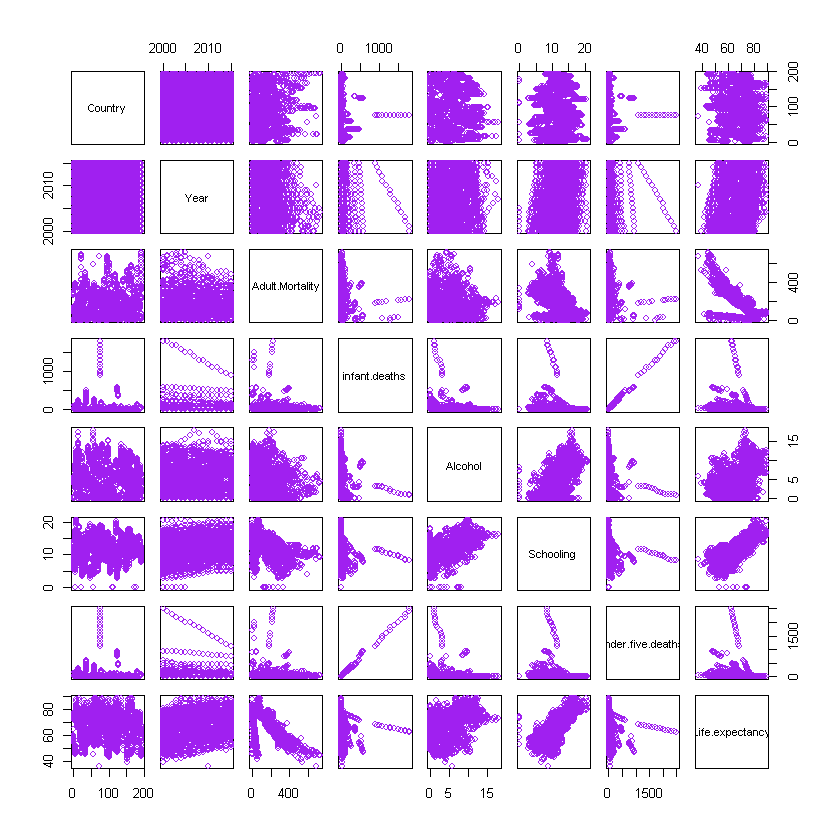

In [145]:
pairs(social_df, col="purple")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


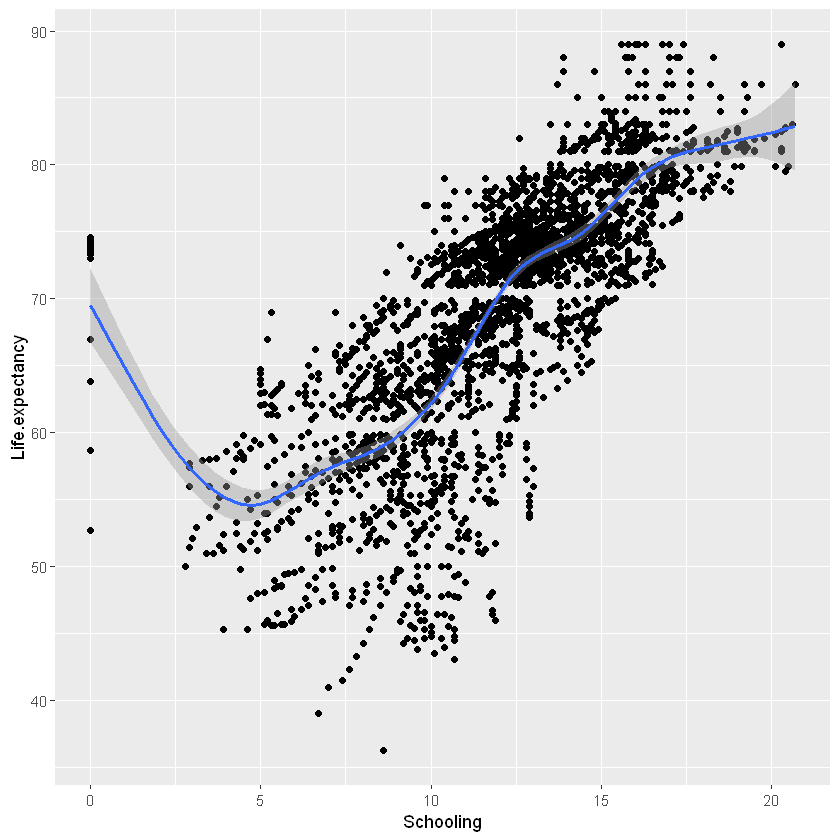

In [289]:
ggplot(social_df, aes(Schooling, Life.expectancy) ) + geom_point() + geom_smooth()

It looks like there is a linearity between Schooling and Life.expectancy

### We have two hypotheses we want to investigate

* What social factors, if any, affect the life expectancy?
* Does alcohol affect the life expectancy of a person?

Quick interaction between independent variables detection:

In [147]:
cor(social_df$Schooling, social_df$Alcohol)
cor(social_df$Adult.Mortality, social_df$Alcohol)

[1] 0.5429748

[1] -0.1738267

We already know the correlation of the other variables from before

##### we are going to start by investigating the first hypothesis

## What social factors affect life expectancy?

we are going to start with a multiple linear regression model

In [148]:
mlm.fit <- lm(Life.expectancy~. -Year -Country, data = social_df)
summary(mlm.fit)


Call:
lm(formula = Life.expectancy ~ . - Year - Country, data = social_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.6730  -2.2988   0.3269   2.7639  21.7993 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       56.8598841  0.5018319 113.305  < 2e-16 ***
Adult.Mortality   -0.0321713  0.0008445 -38.095  < 2e-16 ***
infant.deaths      0.1282995  0.0096396  13.310  < 2e-16 ***
Alcohol            0.0822107  0.0278745   2.949  0.00321 ** 
Schooling          1.4584069  0.0387771  37.610  < 2e-16 ***
under.five.deaths -0.0974370  0.0071148 -13.695  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.812 on 2730 degrees of freedom
Multiple R-squared:  0.7338,	Adjusted R-squared:  0.7333 
F-statistic:  1505 on 5 and 2730 DF,  p-value: < 2.2e-16


we have a pretty good estimation. The p-values are significant and we have a good adjusted R-squared of 0.7333

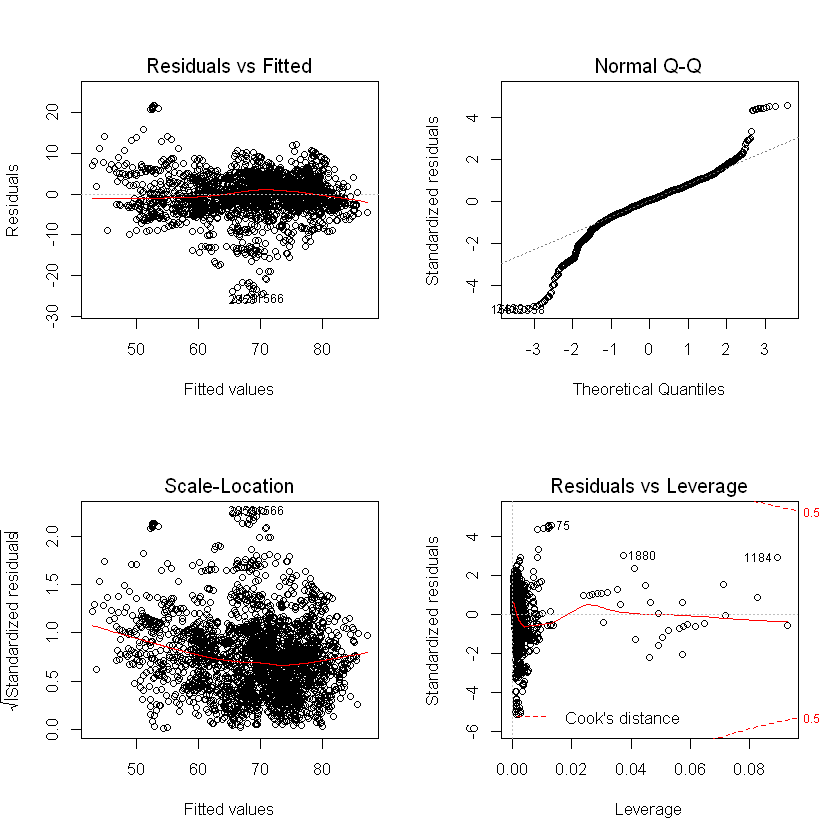

In [149]:
par(mfrow=c(2,2))
plot(mlm.fit)
par(mfrow=c(1,1))

We can see that there is a variance in the residuals, which means we have noise in our data and we can see the leverage points.

# Hypothesis2: Does Alcohol affect the Life Expectancy of people?

#### Let's visualize our data

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


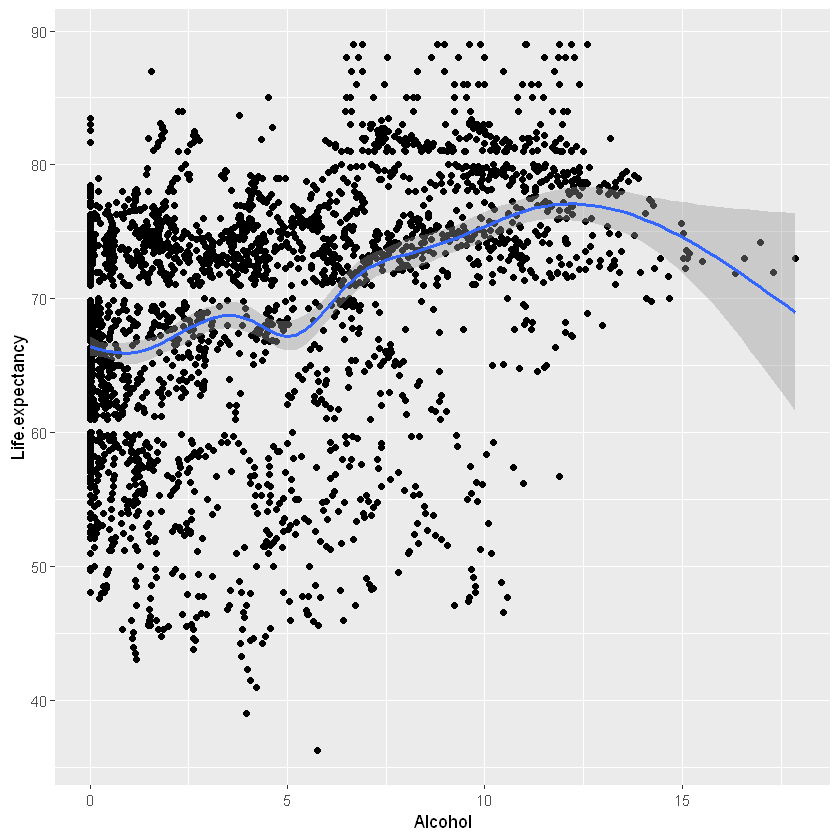

In [150]:
ggplot(social_df, aes(Alcohol,Life.expectancy)) + geom_point() + geom_smooth()

we can see that most points are condensed on the left, when alcohol levels are low

#### let's make our model

In [151]:
alcohol.fit <- lm(Life.expectancy~ Alcohol, data=social_df)
summary(alcohol.fit)


Call:
lm(formula = Life.expectancy ~ Alcohol, data = social_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.318  -4.131   1.624   6.293  20.111 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 65.51670    0.24682  265.45   <2e-16 ***
Alcohol      0.88568    0.04104   21.58   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.615 on 2734 degrees of freedom
Multiple R-squared:  0.1456,	Adjusted R-squared:  0.1453 
F-statistic: 465.8 on 1 and 2734 DF,  p-value: < 2.2e-16


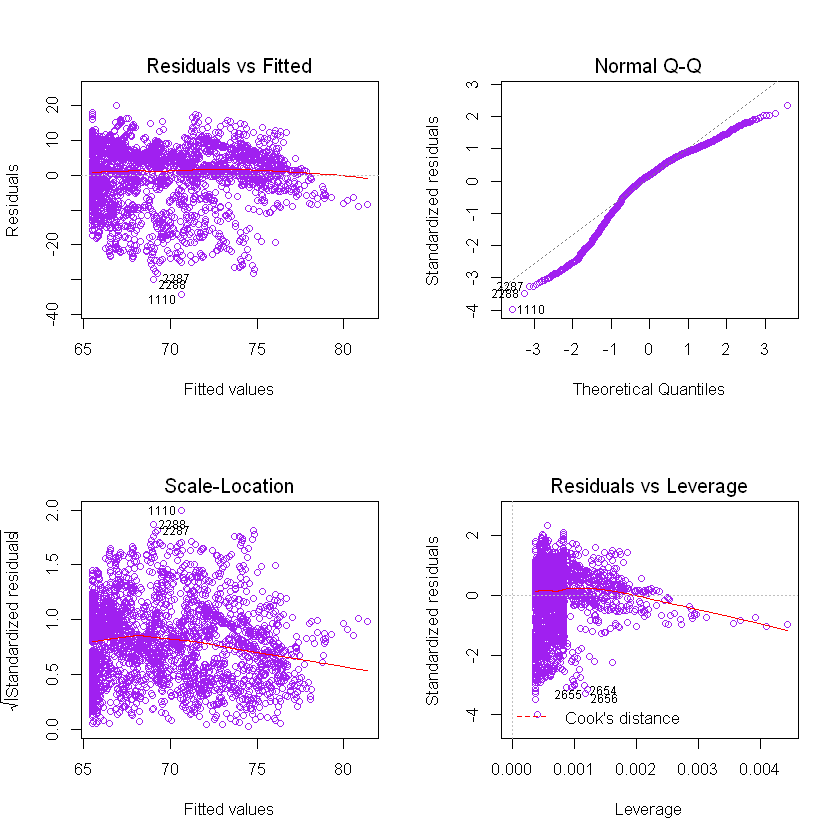

In [152]:
par(mfrow=c(2,2))
plot(alcohol.fit, col="purple")
par(mfrow=c(1,1))

there doesn't seem to be a good pattern, we also have a very low adjusted R-squared of 0.1453 let's try using a polynomial function of Alcohol

We will use a polynomial of degree 2 since teh graph looks like a flipped bell shape

In [290]:
poly_alc <- lm(Life.expectancy ~ I(Alcohol^2), data = social_df)

In [291]:
summary(poly_alc)


Call:
lm(formula = Life.expectancy ~ I(Alcohol^2), data = social_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.971  -4.823   1.783   6.429  19.922 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  66.906400   0.206747  323.62   <2e-16 ***
I(Alcohol^2)  0.071258   0.003424   20.81   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.659 on 2734 degrees of freedom
Multiple R-squared:  0.1368,	Adjusted R-squared:  0.1365 
F-statistic: 433.2 on 1 and 2734 DF,  p-value: < 2.2e-16


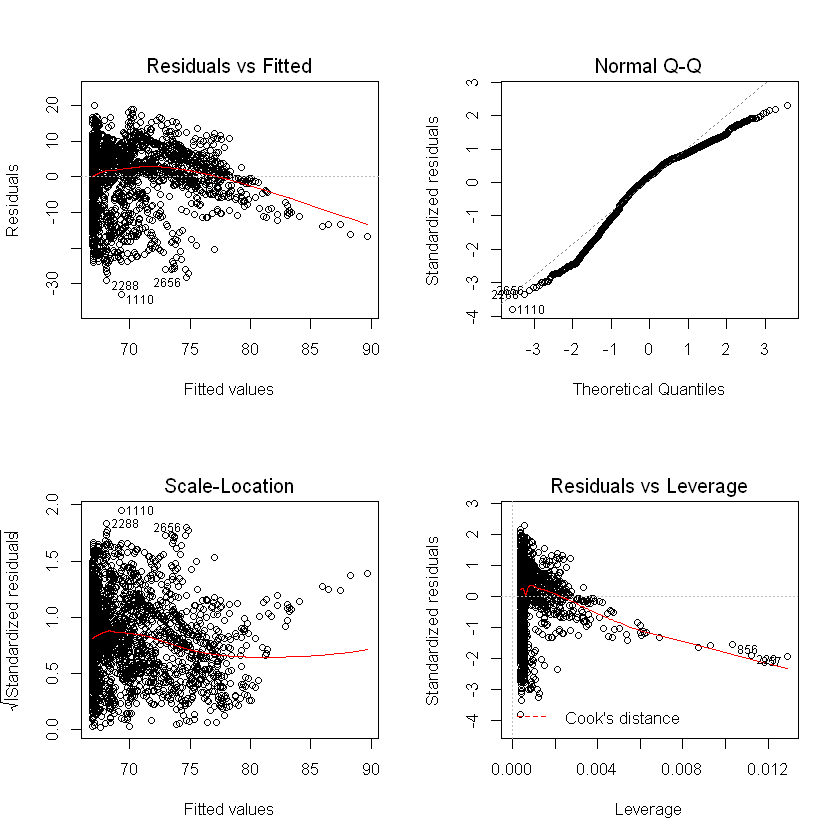

In [292]:
par(mfrow=c(2,2))
plot(poly_alc)
par(mfrow=c(1,1))

Our model seems to be fitting the data better, although we notice a very small R-squared.

# Dataset with All Features

## Next, we will train a model to predict life expectancy using all predictors, health, economic, and social.

#### Let's take a look at our data

In [156]:
df[1:10,]

Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,87.30377,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58.00000,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62.00000,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67.00000,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68.00000,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66.00000,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2
Afghanistan,2009,Developing,58.6,281,77,0.01,56.762217,63,2861,...,63.00000,9.42,63,0.1,445.89330,284331,18.6,18.7,0.434,8.9
Afghanistan,2008,Developing,58.1,287,80,0.03,25.873925,64,1599,...,64.00000,8.33,64,0.1,373.36112,2729431,18.8,18.9,0.433,8.7
Afghanistan,2007,Developing,57.5,295,82,0.02,10.910156,63,1141,...,63.00000,6.73,63,0.1,369.83580,26616792,19.0,19.1,0.415,8.4
Afghanistan,2006,Developing,57.3,295,84,0.03,17.171518,64,1990,...,58.00000,7.43,58,0.1,272.56377,2589345,19.2,19.3,0.405,8.1


#### We have to apply the changes we made to econ_df to this dataset because they contain the same data

In [157]:
df <- df[df$Income.composition.of.resources != 0,]
df[df$Country == "India" & df$Year == 2015, "Population"] <- df[df$Country == "India" & df$Year == 2015, "Population"] * 1000
df[df$Country == "India" & df$Year == 2013, "Population"] <- df[df$Country == "India" & df$Year == 2013, "Population"] * 10
df[df$Country == "India" & df$Year == 2012, "Population"] <- df[df$Country == "India" & df$Year == 2012, "Population"] * 10
df[df$Country == "India" & df$Year == 2011, "Population"] <- df[df$Country == "India" & df$Year == 2011, "Population"] * 10
df[df$Country == "India" & df$Year == 2010, "Population"] <- df[df$Country == "India" & df$Year == 2010, "Population"] * 100
df[df$Country == "India" & df$Year == 2009, "Population"] <- df[df$Country == "India" & df$Year == 2009, "Population"] * 10
df[df$Country == "India" & df$Year == 2008, "Population"] <- df[df$Country == "India" & df$Year == 2008, "Population"] * 10
df[df$Country == "India" & df$Year == 2003, "Population"] <- df[df$Country == "India" & df$Year == 2003, "Population"] * 100
df[df$Country == "India" & df$Year == 2002, "Population"] <- df[df$Country == "India" & df$Year == 2002, "Population"] * 100
df[df$Country == "India" & df$Year == 2001, "Population"] <- df[df$Country == "India" & df$Year == 2001, "Population"] * 10
df[df$Country == "India" & df$Year == 2000, "Population"] <- df[df$Country == "India" & df$Year == 2000, "Population"] * 1000


#### First model: all features

In [158]:
all.fit <- lm(Life.expectancy ~. -Year -Country, data=df)

In [159]:
summary(all.fit)


Call:
lm(formula = Life.expectancy ~ . - Year - Country, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.6329  -1.7076   0.0202   1.7921  13.9520 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      4.190e+01  7.289e-01  57.482  < 2e-16 ***
StatusDeveloping                -7.942e-01  2.448e-01  -3.244  0.00120 ** 
Adult.Mortality                 -1.075e-02  7.215e-04 -14.898  < 2e-16 ***
infant.deaths                    4.811e-02  8.414e-03   5.718 1.23e-08 ***
Alcohol                         -2.493e-01  2.473e-02 -10.082  < 2e-16 ***
percentage.expenditure           2.331e-04  7.524e-05   3.098  0.00197 ** 
Hepatitis.B                     -1.241e-02  5.432e-03  -2.284  0.02244 *  
Measles                         -3.612e-06  8.420e-06  -0.429  0.66795    
BMI                              8.744e-03  4.858e-03   1.800  0.07200 .  
under.five.deaths               -3.538e-02  5.912e-03  -5.983 

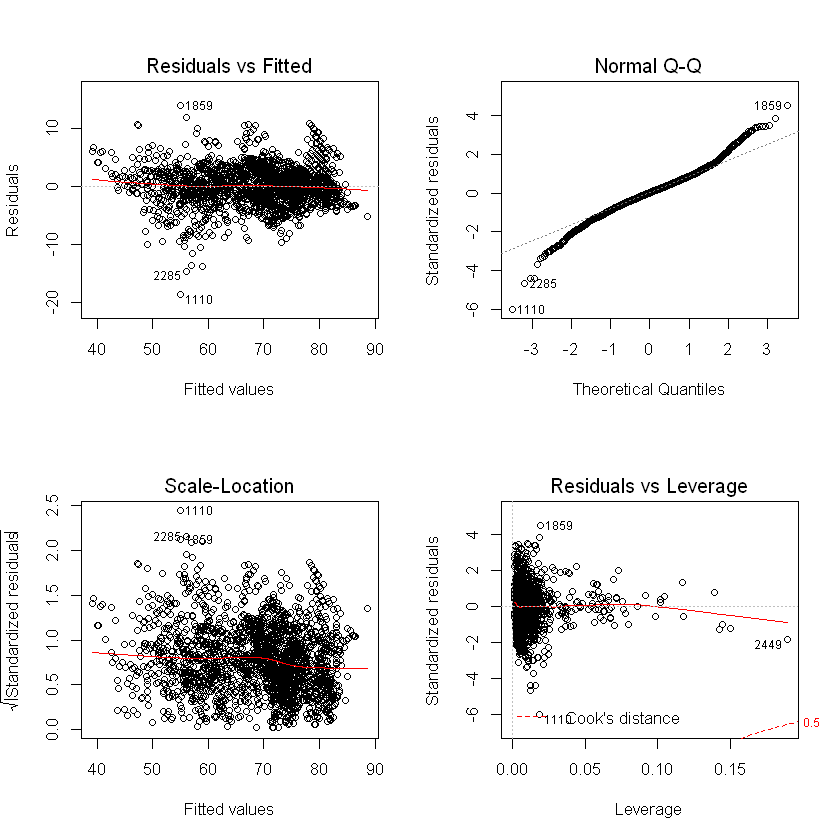

In [160]:
par(mfrow=c(2,2))
plot(all.fit)
par(mfrow=c(1,1))

let's try a modle that combines the best features, we will use the features that best performed on the other datasets

In [161]:
best.fit <- lm(Life.expectancy ~. -Country - Year - Measles - BMI - Population - thinness..1.19.years
               -thinness.5.9.years - infant.deaths - Hepatitis.B - under.five.deaths, data=df)

In [162]:
summary(best.fit)


Call:
lm(formula = Life.expectancy ~ . - Country - Year - Measles - 
    BMI - Population - thinness..1.19.years - thinness.5.9.years - 
    infant.deaths - Hepatitis.B - under.five.deaths, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.4999  -1.7644   0.0443   1.8323  13.0974 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      4.037e+01  6.390e-01  63.168  < 2e-16 ***
StatusDeveloping                -6.974e-01  2.461e-01  -2.834  0.00464 ** 
Adult.Mortality                 -1.122e-02  7.225e-04 -15.533  < 2e-16 ***
Alcohol                         -2.684e-01  2.436e-02 -11.021  < 2e-16 ***
percentage.expenditure           2.401e-04  7.581e-05   3.167  0.00156 ** 
Polio                            4.995e-02  7.440e-03   6.713 2.43e-11 ***
Total.expenditure                1.666e-01  3.128e-02   5.327 1.10e-07 ***
Diphtheria                       1.079e-02  3.984e-03   2.709  0.00679 ** 
HIV.

All our variables have significant p-values. We also have an adjusted R-squared of 0.896 which is good.

Let's plot the model residuals

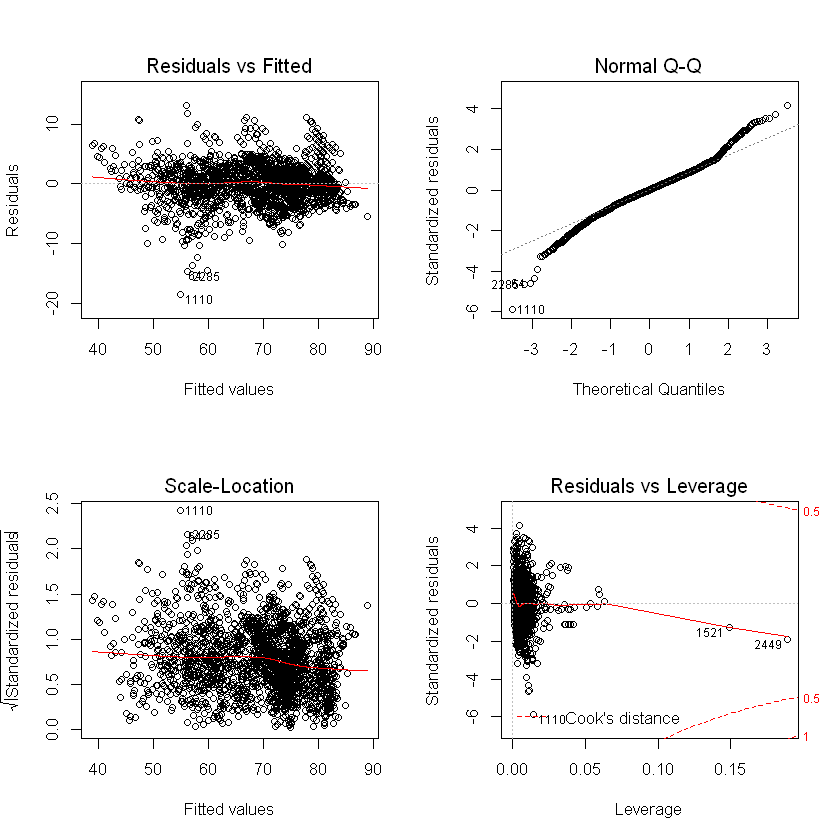

In [163]:
par(mfrow=c(2,2))
plot(best.fit)
par(mfrow=c(1,1))

after trying several combination, the model we obtain is best.fit with the following features:

* StatusDeveloping                
* Adult.Mortality                 
* Alcohol                         
* percentage.expenditure          
* Polio                           
* Total.expenditure               
* Diphtheria                      
* HIV.AIDS                        
* GDP                             
* Income.composition.of.resources 
* Schooling

# Train-Val-Test

Now that we found the best features for our datasets, it is time to investigate our hypothesis:

* Which factors affect the life expectancy?

## full dataset

### 1. Splitting our data into train-test

we will split our datasets into 80% Training, 20% Testing

In [233]:
library(caTools)
set.seed(123)

In [234]:
sample <- sample.split(df$Life.expectancy, SplitRatio = .80)
train_df <- subset(df, sample==TRUE)
test_df <- subset(df, sample==FALSE)

we will use 10-fold cross validation to train our model 

In [235]:
library(caret)
train_control <- trainControl(method = "cv", number = 10)
 

model <- train(Life.expectancy ~. -Country - Year - Measles - BMI - Population - thinness..1.19.years
               -thinness.5.9.years - infant.deaths - Hepatitis.B - under.five.deaths, data = train_df, 
               method = "lm",
               trControl = train_control)

In [236]:
print(model)

Linear Regression 

1733 samples
  21 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1559, 1561, 1560, 1559, 1559, 1560, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  3.19254  0.8982885  2.365326

Tuning parameter 'intercept' was held constant at a value of TRUE


The Mean absolute error (the loss) is the mean over the absolute differences between true and predicted values, deviations in either direction from the true value are treated the same way.

The predicted values deviate by 2 years from the actual value, which is good regarding our context.

The RMSE estimates the deviation of the actual y-values from the regression line.

Our RMSE value is 3.19 which is really high, this is because our dependent variable does not have a normal distribution, so the values are far from the fitted line.

In [237]:
#predictions
predictions <- model %>% predict(test_df)

In [238]:
# Prediction error, RMSE
RMSE(predictions, test_df$Life.expectancy)
# R-square
R2(predictions, test_df$Life.expectancy)

[1] 3.107524

[1] 0.8898327

we can see a good R-squared value of 0.8898, the test RMSE is still high

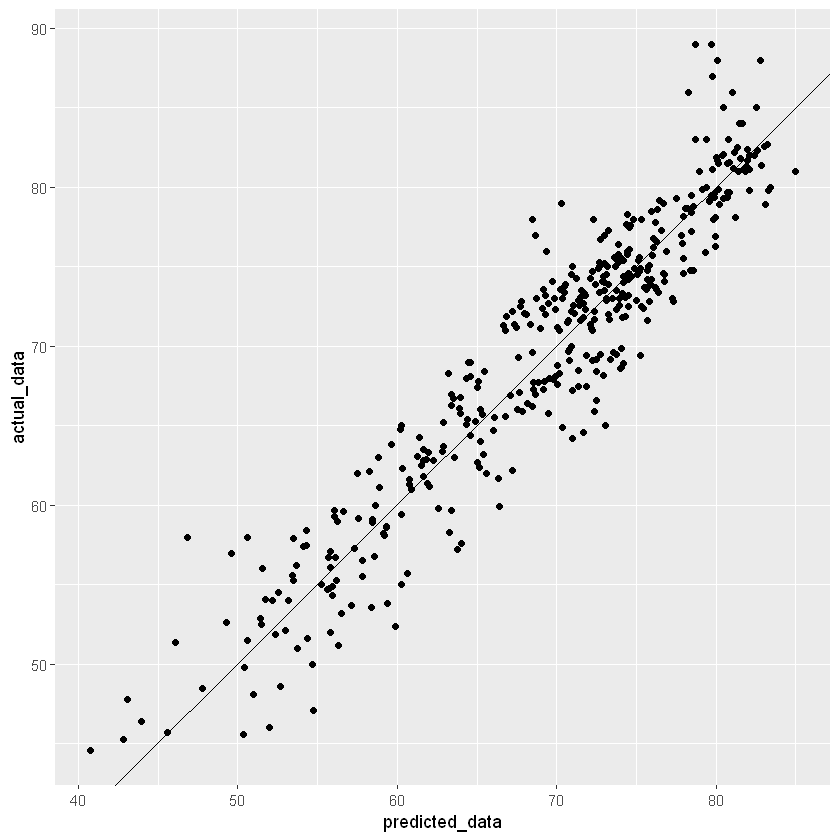

In [239]:
plot_data <- data.frame( predicted_data = predict(model, test_df), actual_data= test_df$Life.expectancy )

ggplot( plot_data, aes( x=predicted_data, y=actual_data ) ) + geom_point()+ geom_abline(intercept =0, slope=1)

The RMSE is scary but overall the plot looks good,some values are far from the fitted line.

## Health dataset

In [240]:
sample <- sample.split(health_df$Life.expectancy, SplitRatio = .80)
train_df <- subset(health_df, sample==TRUE)
test_df <- subset(health_df, sample==FALSE)

In [241]:
train_control <- trainControl(method = "cv", number = 10)
 

model <- train(Life.expectancy~. - Country - Year -Hepatitis.B -Measles  - thinness.5.9.years + 
         infant.deaths:under.five.deaths, data = train_df, 
               method = "lm",
               trControl = train_control)

In [242]:
print(model)

Linear Regression 

2318 samples
  13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2086, 2086, 2086, 2085, 2086, 2087, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  4.773324  0.7503973  3.629176

Tuning parameter 'intercept' was held constant at a value of TRUE


The RMSE is still high with value of 3, it is because our target is not normalized

In [243]:
#predictions
predictions <- model %>% predict(test_df)

In [244]:
# Prediction error, RMSE
RMSE(predictions, test_df$Life.expectancy)
# R-square
R2(predictions, test_df$Life.expectancy)

[1] 4.68631

[1] 0.7418913

this model is not acheive better results than the model with different types of attributes, we still notice a significant R-squared

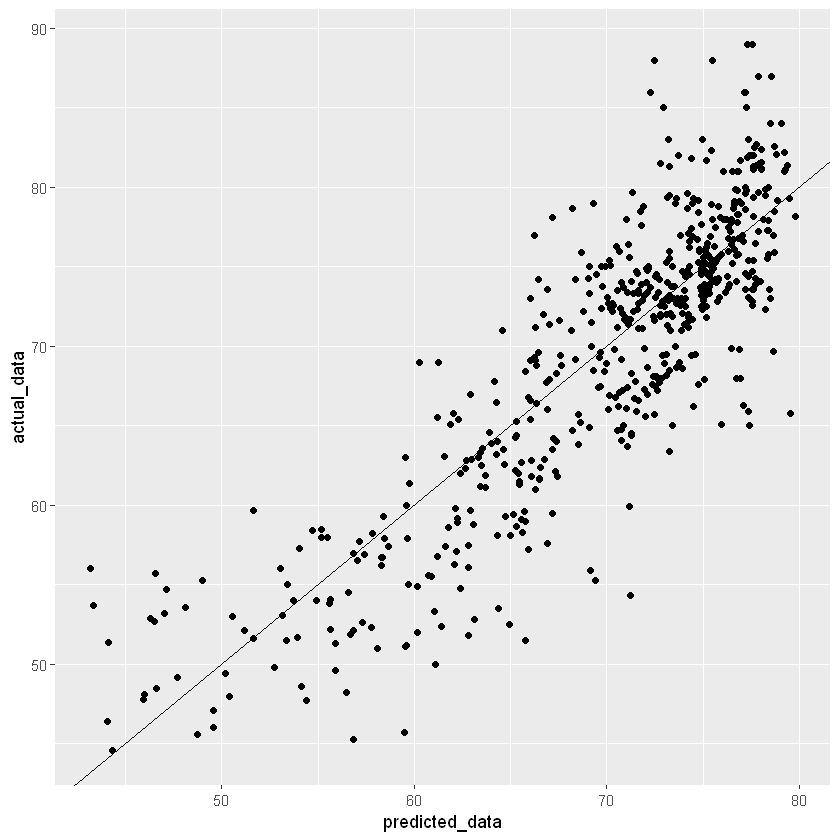

In [245]:
plot_data <- data.frame( predicted_data = predict(model, test_df), actual_data= test_df$Life.expectancy )

ggplot( plot_data, aes( x=predicted_data, y=actual_data ) ) + geom_point()+ geom_abline(intercept =0, slope=1)

In [258]:
the values are much farther from teh fitted line comapared to the previous model.Hence why the RMSE is so large

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: the values
        ^


## Economic data

In [246]:
sample <- sample.split(econ_df$Life.expectancy, SplitRatio = .80)
train_df <- subset(econ_df, sample==TRUE)
test_df <- subset(econ_df, sample==FALSE)

In [247]:
train_control <- trainControl(method = "cv", number = 10)
 

model <- train(Life.expectancy~ Income.composition.of.resources, data = train_df, 
               method = "lm",
               trControl = train_control)

In [248]:
print(model)

Linear Regression 

1744 samples
   1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1569, 1569, 1572, 1571, 1569, 1571, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  4.549515  0.7913044  3.427598

Tuning parameter 'intercept' was held constant at a value of TRUE


In [249]:
#predictions
predictions <- model %>% predict(test_df)

In [250]:
# Prediction error, RMSE
RMSE(predictions, test_df$Life.expectancy)
# R-square
R2(predictions, test_df$Life.expectancy)

[1] 4.397847

[1] 0.7784166

This model has a better r-squared than the one with the health data only. It still performes worse than the model with the different types of variables

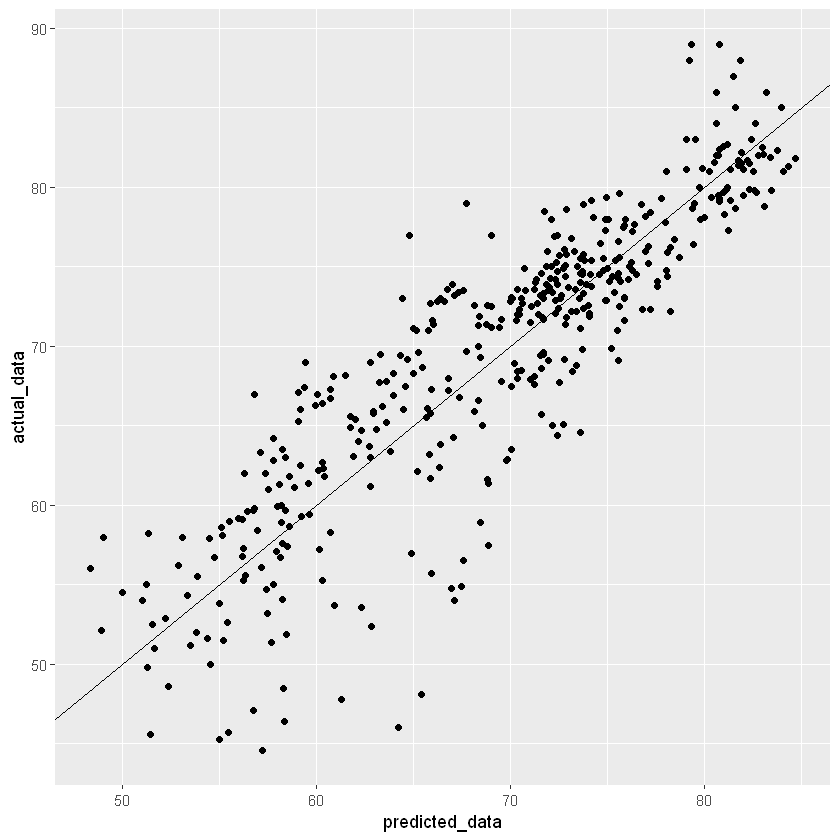

In [251]:
plot_data <- data.frame( predicted_data = predict(model, test_df), actual_data= test_df$Life.expectancy )

ggplot( plot_data, aes( x=predicted_data, y=actual_data ) ) + geom_point()+ geom_abline(intercept =0, slope=1)

we notice that at the left, the data are farther from the fitted line, it decreases as we go towards the right. That is why the RMSE is large

## Social dataset

In [252]:
sample <- sample.split(social_df$Life.expectancy, SplitRatio = .80)
train_df <- subset(social_df, sample==TRUE)
test_df <- subset(social_df, sample==FALSE)

In [253]:
train_control <- trainControl(method = "cv", number = 10)
 

model <- train(Life.expectancy~. -Year -Country, data = train_df, 
               method = "lm",
               trControl = train_control)

In [254]:
print(model)

Linear Regression 

2192 samples
   7 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1974, 1973, 1973, 1974, 1971, 1973, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  4.849438  0.7353675  3.396136

Tuning parameter 'intercept' was held constant at a value of TRUE


In [255]:
#predictions
predictions <- model %>% predict(test_df)

In [256]:
# Prediction error, RMSE
RMSE(predictions, test_df$Life.expectancy)
# R-square
R2(predictions, test_df$Life.expectancy)

[1] 4.718526

[1] 0.720332

this model is the the worst performing model of 0.7118, the RMSE is still high relatively, because the target value does not have normal distribution

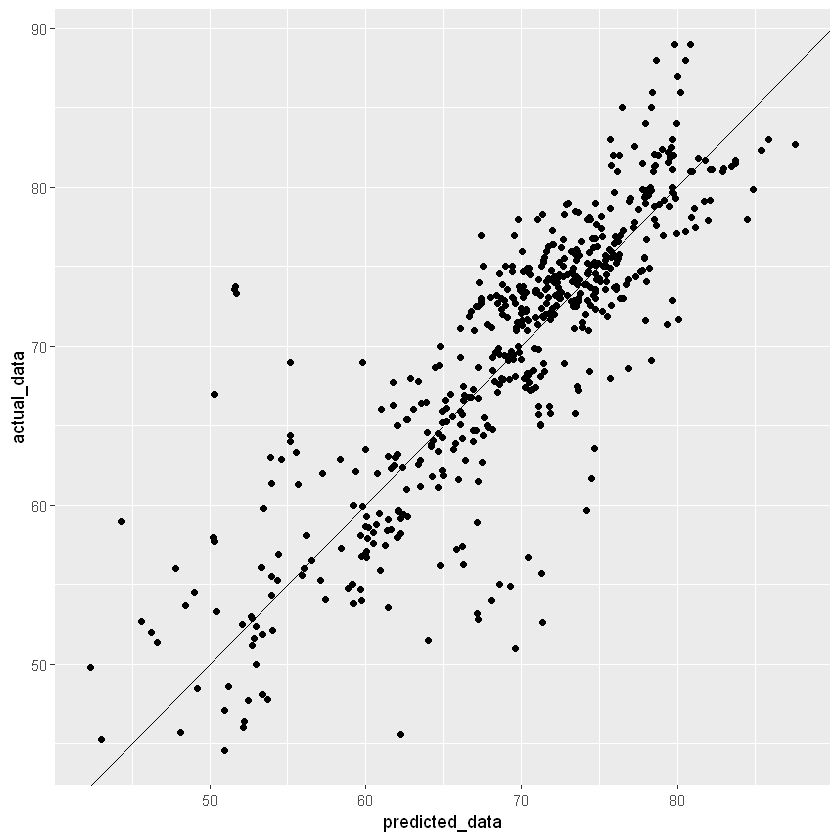

In [257]:
plot_data <- data.frame( predicted_data = predict(model, test_df), actual_data= test_df$Life.expectancy )

ggplot( plot_data, aes( x=predicted_data, y=actual_data ) ) + geom_point()+ geom_abline(intercept =0, slope=1)

We have many values that are far from the fitted line

## Alcohol vs Life.expectancy

In [259]:
sample <- sample.split(social_df$Life.expectancy, SplitRatio = .80)
train_df <- subset(social_df, sample==TRUE)
test_df <- subset(social_df, sample==FALSE)

In [260]:
train_control <- trainControl(method = "cv", number = 10)
 

model <- train(Life.expectancy~ Alcohol, data = train_df, 
               method = "lm",
               trControl = train_control)

In [261]:
print(model)

Linear Regression 

2192 samples
   1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1972, 1973, 1972, 1973, 1972, 1973, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  8.730148  0.1451682  6.819603

Tuning parameter 'intercept' was held constant at a value of TRUE


In [263]:
#predictions
predictions <- model %>% predict(test_df)

In [264]:
# Prediction error, RMSE
RMSE(predictions, test_df$Life.expectancy)
# R-square
R2(predictions, test_df$Life.expectancy)

[1] 8.092424

[1] 0.1550281

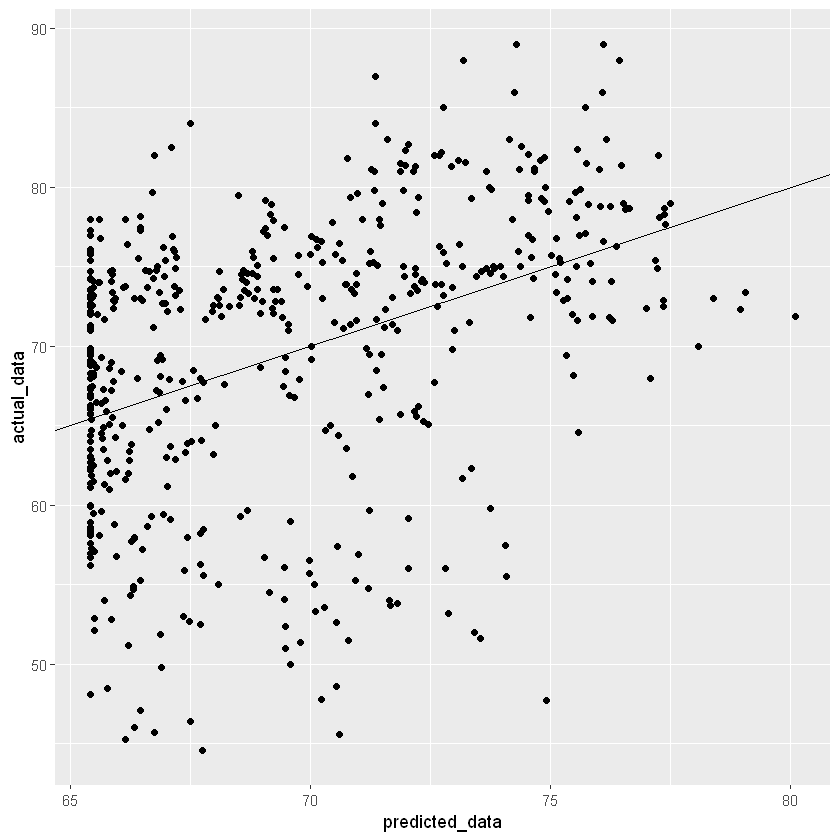

In [265]:
plot_data <- data.frame( predicted_data = predict(model, test_df), actual_data= test_df$Life.expectancy )

ggplot( plot_data, aes( x=predicted_data, y=actual_data ) ) + geom_point()+ geom_abline(intercept =0, slope=1)

We can see overall from the plot, and RMSE of 8, that Alcohol does not affect life expectancy.

# Conclusion

After an exhausting study, we conclude that no specific kind of attributes are <strong> better </strong> at predicting life expectancy. However, a combination of several health, economic, and social factors can perform really well at predicting life expectency. 

Regarding our model, we see that our model does not perform really well at predicting life expectency because the target attribute is not normally distributed. However, we got a good testing R-squared for all models.

## Comparing the best Model with KNN

In [329]:
sample <- sample.split(df$Life.expectancy, SplitRatio = .80)
train_x <- subset(df, sample==TRUE)
test_x <- subset(df, sample==FALSE)

In [343]:
range <- 1:10
for ( i in range){
model <- train(
  Life.expectancy ~ . -Country - Year - Measles - BMI - Population - thinness..1.19.years
               -thinness.5.9.years - infant.deaths - Hepatitis.B - under.five.deaths,
  data = train_x,
  method = 'knn',
  preProcess = c("center", "scale")
)
    }



In [342]:
model

k-Nearest Neighbors 

414 samples
 21 predictor

Pre-processing: centered (11), scaled (11) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 373, 373, 373, 372, 372, 374, ... 
Resampling results across tuning parameters:

  k  RMSE      Rsquared   MAE     
  5  3.462462  0.8677890  2.587626
  7  3.558845  0.8634579  2.648281
  9  3.570657  0.8636443  2.685023

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 5.

AMAZING Results, we have an R-squared of 0.91 and the RMSE was dows do 2.93

In [336]:
#predictions
test.features = subset(test_x, select=-c(Life.expectancy))
predictions = predict(model, newdata = test.features)

In [339]:
#RMSE
test.target = subset(test_x, select=Life.expectancy)[,1]
sqrt(mean((test.target - predictions)^2))

[1] 2.389483

In [340]:
# R2
cor(test.target, predictions) ^ 2

[1] 0.9338058

We have a testing RMSE of 2.38 and testing R_squared of 0.933

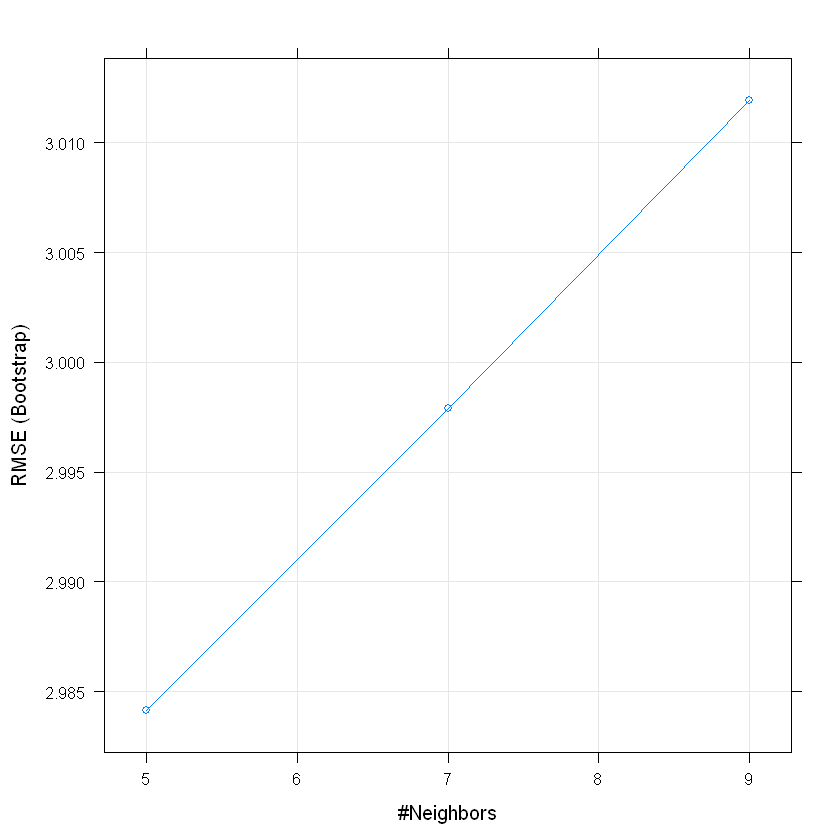

In [344]:
plot(model)

# Conclusion

KNN has shown to perform better than the linear model when given the same predictors.